# AllLife Bank Personal Loan Campaign

### Description
#### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

#### Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant?
3. Which segment of customers should be targeted more?

#### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

#### Key Assumptions
- While the dataset contains information about income, it does not throw any light on the professions of the customers or the number of jobs they hold.
- We also do not have any insights about the CC spending of these customers - what they purchase, how often they purchase, and etc - to understand whether the average spending is justified or if there are any errors or outliers
- The purpose of Mortgage is also unknown, whether it is personal, or for buying a house or for renovating one.
- We also do not know the timelines in which this data was collected, whether it was pre-pandemic or post. This could affect our research, e.g.: during the pandemic, more customers purchased houses, cars and made lifestyle changes like moving to the suburbs. Therefore, in the period from 2020 to 2022, average mortgage sizes increased than during the years before.

#### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("mode.chained_assignment", None)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# for logisitic regression modeling
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# for feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# compute class weights for imbalanced data
from sklearn.utils import class_weight

# StandardFeatureSelection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

Necessary libraries have been imported

#### Load and review data characteristics

In [2]:
pdata = pd.read_csv("Loan_Modelling (1).csv")

<IPython.core.display.Javascript object>

Dataset has been loaded successfully.

#### Understand shape of the dataset.

In [3]:
pdata.shape

(5000, 14)

<IPython.core.display.Javascript object>

#### View the first and last 5 rows of the dataset.

In [4]:
pdata.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

In [5]:
pdata.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

#### Understand datatypes and null values in the dataset.

In [6]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

#### Statistical summary of the dataset

In [7]:
pdata.describe(include="all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<IPython.core.display.Javascript object>

#### Duplicate rows

In [8]:
pdata[pdata.duplicated()]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>

1. There are 5000 rows and 14 columns, including our target variable: Personal Loan
2. The column Personal Loan has two values: 1- for customers who took a personal loan in the last campaign and 0: for those who did not.
- 1: Customers with personal loan
- 0: Customers without personal loan
3. From prelimnary analysis, there are no null values in any column or duplicated rows. We will continue to investigate the nature of data in the column to ensure there are no null or abnormal values in any column.
4. The column 'Experience' has negative values, therefore we will need to investigate and understand what is the relevance of this negative value and if it is irrelevant, do the necessary to correct/drop. 
5. The median age of the dataset is 45 years, the minimum being 23 and maximum being 67. 
6. The average Annual Income is 73,000, ranging between 8000 to 224000.
7. CCAvg is the only float column.


##### Categorizing the different variables
From our initial analyses of the variables, there are certain inferences we can make about the nature of the variables:

Target Variable:
- Personal Loan

Nominal Variables:
- ID
- Zip Code

Categorical Variables:
- Education
- Securities_Account
- CD_Account
- Online
- CreditCard
- Family

Interval Variables:
- Age
- Experience
- Income
- CCAvg
- Mortgage


We can convert the ZipCode column into a categorical column by converting the values into counties. Since these are US Zip codes, we can use the uszipcode package to do this conversion. This package is updated till 2020. 

In [ ]:
# installing the uszipcode package
!pip install uszipcode

uszipcode packaged is installed

In [10]:
# importing search from the uszipcode package
from uszipcode import SearchEngine, SimpleZipcode, ComprehensiveZipcode

search = SearchEngine()

<IPython.core.display.Javascript object>

In [11]:
# counting the number of unique values in ZIPCode column
pdata.ZIPCode.nunique()

467

<IPython.core.display.Javascript object>

There are 467 unique zipcodes in the dataset

In [12]:
# we will search the package for a matching zipcode
# where there is a match, it will assign the county to a new column in the dataset
# if there is no match it will return an N/A
pdata["county"] = pdata["ZIPCode"].apply(
    lambda x: search.by_zipcode(x).county if search.by_zipcode(x) else "N/A"
)

<IPython.core.display.Javascript object>

In [13]:
pdata[pdata["county"] == "N/A"].shape

(34, 15)

<IPython.core.display.Javascript object>

There are 34 rows for which no matching zipcode was returned from the package and therefore the county is N/A.

In [14]:
# let's check how many zipcodes which returned county as N/A
pdata[pdata["county"] == "N/A"].groupby(["ZIPCode"])["county"].count().sort_values(
    ascending=False
)

ZIPCode
92717    22
96651     6
92634     5
93077     1
Name: county, dtype: int64

<IPython.core.display.Javascript object>

Four zipcodes were not available in the package. A quick research in Google helps to find the counties for these zipcodes
- 92717 - Orange County
- 96651 - El Dorado
- 92634 - Orange County
- 93077 - Ventura County

Let's try to impute these values

In [15]:
# imputing the county names to N/A by checking the zipcode

pdata.loc[pdata.isin({"ZIPCode": [92717]})["ZIPCode"], "county"] = "Orange County"
pdata.loc[pdata.isin({"ZIPCode": [96651]})["ZIPCode"], "county"] = "El Dorado"
pdata.loc[pdata.isin({"ZIPCode": [92634]})["ZIPCode"], "county"] = "Orange County"
pdata.loc[pdata.isin({"ZIPCode": [93077]})["ZIPCode"], "county"] = "Ventura County"

# verifying that the data has been correctly imputed
pdata.loc[
    pdata.isin({"ZIPCode": [92717, 96651, 92634, 93077]})["ZIPCode"], "county"
].sort_values(ascending=True)

630          El Dorado
1426         El Dorado
672          El Dorado
2731         El Dorado
3525         El Dorado
1653         El Dorado
2957     Orange County
4090     Orange County
1844     Orange County
4276     Orange County
2486     Orange County
2428     Orange County
2218     Orange County
2211     Orange County
2049     Orange County
4321     Orange County
3887     Orange County
106      Orange County
1483     Orange County
4384     Orange County
1189     Orange County
1099     Orange County
780      Orange County
721      Orange County
695      Orange County
476      Orange County
468      Orange County
366      Orange County
321      Orange County
184      Orange County
172      Orange County
1752     Orange County
4392     Orange County
384     Ventura County
Name: county, dtype: object

<IPython.core.display.Javascript object>

In [16]:
# counting the unique values in county column
pdata["county"].nunique()

39

<IPython.core.display.Javascript object>

We now have 39 counties instead of 467 zip codes. However this is still a very high number, and will make the dataset heavy when we try to do OneHotEncoding. Let's see if it is possible to further reduce them by mapping them to states or regions or other meaningful data

In [17]:
# counting the number of zipcodes in each county
# sorting the list
pdata.groupby(["county"])["ZIPCode"].count().sort_values(ascending=False)

county
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             115
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
T

<IPython.core.display.Javascript object>

All these counties are in California, therefore we can map these counties to one of the official regions in California. Counties and regions will help to derive more meaningful insights from our dataset, instead of using zip codes.

In [18]:
# declaring a dictionary of counties and their corresponding regions.
county_region = {
    "Los Angeles County": "South Coast",
    "San Diego County": "Southern California",
    "Santa Clara County": "San Francisco Bay",
    "Alameda County": "East Bay",
    "Orange County": "Southern California",
    "San Francisco County": "Northern California",
    "San Mateo County": "San Francisco Bay",
    "Sacramento County": "Northern California",
    "Santa Barbara County": "California Central Coast",
    "Yolo County": "Sacramento Valley",
    "Monterey County": "Northern California",
    "Ventura County": "Greater Los Angeles California Central Coast",
    "San Bernardino County": "Southern California",
    "Contra Costa County": "Bay-Delta region",
    "Santa Cruz County": "San Francisco Bay",
    "Riverside County": "Southern California",
    "Kern County": "Central Valley",
    "Marin County": "San Francisco Bay",
    "Solano County": "San Francisco Bay",
    "San Luis Obispo County": "California Central Coast",
    "Humboldt County": "Northern Pacific Coast",
    "Sonoma County": "San Francisco Bay",
    "Fresno County": "San Joaquin Valley",
    "Placer County": "Northern California",
    "Butte County": "California Central Valley",
    "Shasta County": "Sacramento Valley",
    "El Dorado County": "Northern California",
    "Stanislaus County": "Central Valley",
    "San Benito County": "Central Coast",
    "San Joaquin County": "San Joaquin Valley",
    "Mendocino County": "California North Coast",
    "Siskiyou County": "Northern California",
    "Tuolumne County": "Sierra Nevada",
    "El Dorado": "San Martín",
    "Merced County": "San Joaquin Valley",
    "Lake County": "Northern California",
    "Trinity County": "North Coast",
    "Napa County": "North Bay",
    "Imperial County": "Imperial Valley",
}

# assigning the region value by mapping the value from the dictionary
# finally converting the region and county to category datatypes
pdata["region"] = pdata["county"].map(county_region).astype("category")
pdata["county"] = pdata["county"].astype("category")

<IPython.core.display.Javascript object>

In [19]:
# counting the number of unique regions
pdata["region"].nunique()

20

<IPython.core.display.Javascript object>

We have been able to reduce 467 zipcodes into 39 counties and further into 20 regions. This will help us as we proceed with EDA and one hot encoding. 

#### Analyzing the unique values in the categorical and target variables

In [20]:
# assigning categorical and target variables to cat_cols
# running a for loop to count values in categorical variable columns
cat_cols = [
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "Family",
    "Personal_Loan",
    "county",
    "region",
]

for cols in cat_cols:
    print("Name of variable:", cols)
    df = pdata[cols].value_counts()
    print(df)
    print("-" * 50)

Name of variable: Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
Name of variable: Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
Name of variable: CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
Name of variable: Online
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
Name of variable: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------
Name of variable: Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
Name of variable: Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64
--------------------------------------------------
Name of variable: county
Los Angeles County      

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. There are no null values in the categorical and target variables.
2. There are 20 regions and 39 counties in which loan purchases have been recorded.
3. Out of the 5000 customers in the dataset, 480 acquired a personal loan in the last campaign.
4. Personal Loan, CreditCard, CD Account, Securities Account and Online have binary values.

#### Analyzing the null values in the numerical variables

We will analyze whether null values exist in Age, Income, Experience, CCAvg and Mortgage

In [21]:
# initializing values to check
list_of_values = [0, 0.0]

<IPython.core.display.Javascript object>

In [22]:
# check whether any Income values match the list of values
pdata[pdata["Income"].isin(list_of_values)]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, county, region]
Index: []

<IPython.core.display.Javascript object>

There are no null values in Income column

In [23]:
# check whether any Age values match the list of values
pdata[pdata["Age"].isin(list_of_values)]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, county, region]
Index: []

<IPython.core.display.Javascript object>

There are no null values in Age column

In [24]:
# check whether any Experience values match the list of values
pdata[pdata["Experience"].isin(list_of_values)].sample(n=10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
182    183   24           0     135    95133       1    1.5          1   
105    106   24           0      35    94704       3    0.1          2   
418    419   27           0      33    90089       4    1.0          3   
1337  1338   26           0     179    92028       4    2.1          2   
466    467   25           0      13    91342       2    0.9          3   
2157  2158   25           0      71    93727       4    0.2          1   
4393  4394   24           0      59    95521       4    1.6          1   
363    364   25           0      30    92691       2    1.7          2   
3818  3819   26           0     102    94305       4    2.3          3   
4679  4680   26           0     161    94551       2    7.2          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
182          0              0                   0           0       1   
105          0              0                   1           0       1   
418          0              0                   0           0       0   
1337         0              1                   0           0       0   
466          0              0                   0           0       1   
2157        78              0                   1           0       0   
4393         0              0                   0           0       0   
363          0              0                   0           0       0   
3818         0              0                   0           0       0   
4679         0              0                   0           0       0   

      CreditCard              county                  region  
182            0  Santa Clara County       San Francisco Bay  
105            0      Alameda County                East Bay  
418            0  Los Angeles County             South Coast  
1337           0    San Diego County     Southern California  
466            0  Los Angeles County             South Coast  
2157           0       Fresno County      San Joaquin Valley  
4393           0     Humboldt County  Northern Pacific Coast  
363            0       Orange County     Southern California  
3818           0  Santa Clara County       San Francisco Bay  
4679           0      Alameda County                East Bay

<IPython.core.display.Javascript object>

There are some cases where Experience is 0, we can check what is the Age of these customers to arrive at a conclusion

In [25]:
# count null values by the Age
pdata[pdata["Experience"].isin(list_of_values)]["Age"].value_counts()

26    28
25    17
24    11
27     8
29     1
30     1
Name: Age, dtype: int64

<IPython.core.display.Javascript object>

It seems that Experience is null for really young customers between 26-30 years of age. These customers could be at the end of their learning years or very early in their careers for their experience to count. We can retain these null values as valid. 

In [26]:
# check whether any Income values match the list of values
pdata[pdata["CCAvg"].isin(list_of_values)].head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
63    64   42          17      32    94523       4    0.0          2   
128  129   38          14      74    92182       2    0.0          1   
198  199   27           3      59    94123       4    0.0          1   
210  211   51          26      20    92131       2    0.0          1   
215  216   38          14      92    95818       2    0.0          1   
253  254   47          21     138    94583       1    0.0          1   
260  261   51          27      58    92407       1    0.0          1   
296  297   34           9     122    90623       1    0.0          1   
444  445   64          40      91    93106       2    0.0          3   
594  595   50          26      85    94143       1    0.0          1   

     Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
63          0              0                   0           0       1   
128         0              0                   1           0       1   
198        90              0                   1           0       1   
210         0              0                   0           0       0   
215       249              0                   0           0       1   
253         0              0                   0           0       0   
260         0              0                   0           0       0   
296         0              0                   0           0       1   
444         0              0                   0           0       1   
594       144              0                   0           0       0   

     CreditCard                 county                    region  
63            0    Contra Costa County          Bay-Delta region  
128           0       San Diego County       Southern California  
198           0   San Francisco County       Northern California  
210           0       San Diego County       Southern California  
215           1      Sacramento County       Northern California  
253           0    Contra Costa County          Bay-Delta region  
260           1  San Bernardino County       Southern California  
296           0          Orange County       Southern California  
444           1   Santa Barbara County  California Central Coast  
594           0   San Francisco County       Northern California

<IPython.core.display.Javascript object>

In [27]:
# checking the number of rows with 0 values for CCAvg
pdata[pdata["CCAvg"].isin(list_of_values)].shape

(106, 16)

<IPython.core.display.Javascript object>

In [28]:
# checking what percentage of credit card owners have null CC spending
pdata.loc[pdata["CCAvg"].isin(list_of_values), "CreditCard"].value_counts()

0    78
1    28
Name: CreditCard, dtype: int64

<IPython.core.display.Javascript object>

Out of the 106 rows where CC spending is 0, 78 customers are recorded as not having a credit card and 28 as having one, other than that of AllLife Bank. As of now, we do not have much information to treat the null values in this column. We can proceed by retaining these values and take steps as additional information emerge. 

In [29]:
pdata[pdata["Mortgage"].isin(list_of_values)].shape

(3462, 16)

<IPython.core.display.Javascript object>

There are many rows with Mortgage = 0.0, but we know from the description of the dataset that this dataset contains customers who have not taken any mortgage. Therefore these values can be considered null and be retained.

#### Exploratory Data Analysis

#### Univariate Analysis

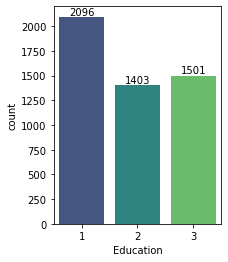

<IPython.core.display.Javascript object>

In [30]:
# plotting countplot for the Education column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="Education", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

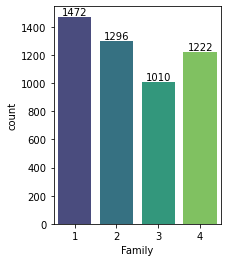

<IPython.core.display.Javascript object>

In [31]:
# plotting countplot for the Family column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="Family", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

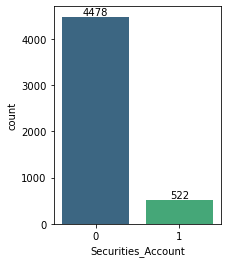

<IPython.core.display.Javascript object>

In [32]:
# plotting countplot for the Securities Account column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="Securities_Account", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

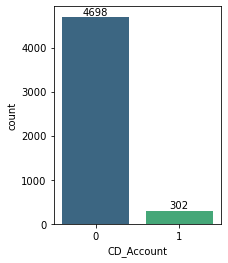

<IPython.core.display.Javascript object>

In [33]:
# plotting countplot for the CD Accounts column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="CD_Account", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

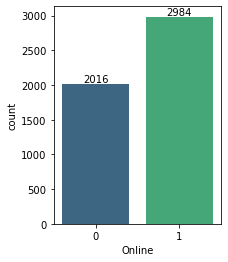

<IPython.core.display.Javascript object>

In [34]:
# plotting countplot for the Online column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="Online", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

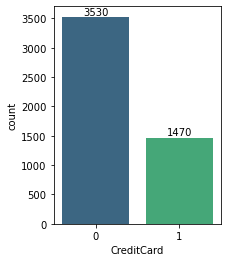

<IPython.core.display.Javascript object>

In [35]:
# plotting countplot for the Credit Card column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="CreditCard", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

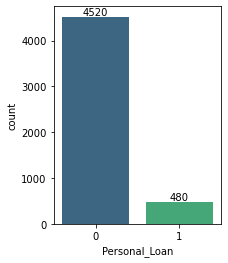

<IPython.core.display.Javascript object>

In [36]:
# plotting countplot for the Personal Loan column
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

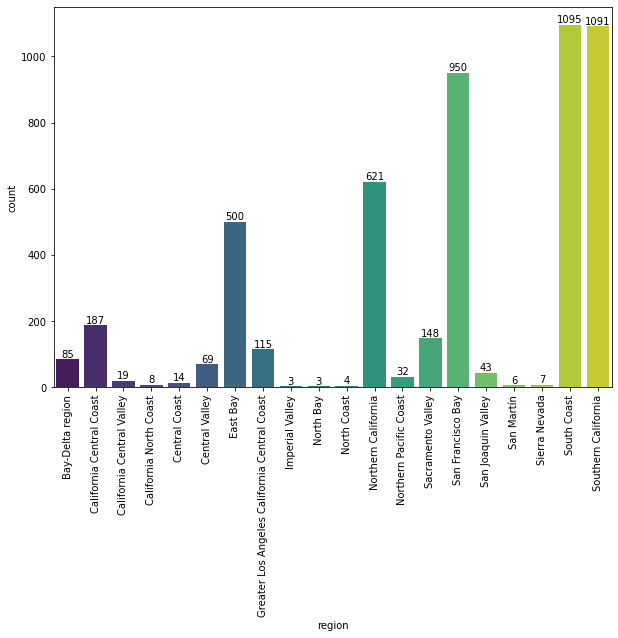

<IPython.core.display.Javascript object>

In [37]:
# plotting countplot for the region column
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=pdata, x="region", palette="viridis")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

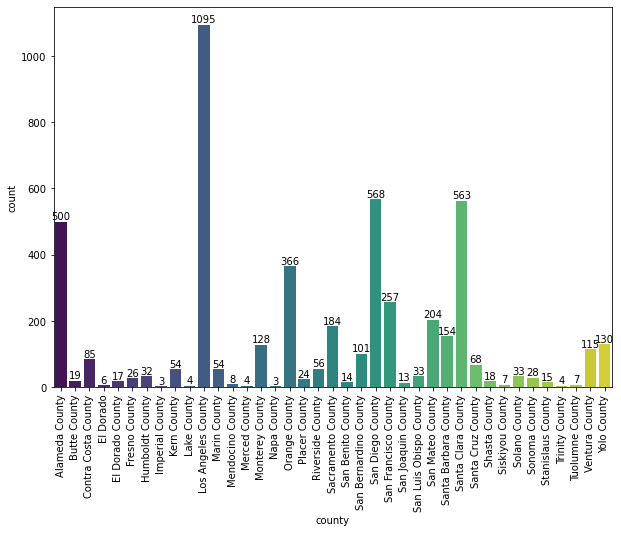

<IPython.core.display.Javascript object>

In [38]:
# plotting countplot for the county
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=pdata, x="county", palette="viridis")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

##### <span style="color:blue">Observations</span>
1. Most customers have an undergrad education, followed by professional/advanced education. Graduate customers are the lowest in the dataset. 
2. Most customers are single in the dataset. Customers with a family size of 2 & 4 are the next highest in number, followed by family sizes of 3. 
3. Only very few customers hold a Securities or CD Account. 
4. Customers with other bank credit cards are also fewer in number, only 1470. 
5. Online accounts are very popular and more than half of the dataset owns an online account. 
6. Only very few customers, less than 10%, availed the personal loan from last year's campaign.
5. Most customers have been recorded from the South Coast region (1095) followed by Southern California region (1091). 
6. Most customers have been recorded from Los Angeles county (1095), followed by San Diego County (568).

Let's bin the Interval variables in order to help us with defining a customer profile
- Income
- CCAvg
- Mortgage
- Experience
- Age

In [39]:
# binning the interval variables to create customer profile

pdata["income_bin"] = pd.cut(
    x=pdata["Income"],
    bins=[5, 39, 98, 224],
    labels=["Low", "Middle", "High"],
    right=False,
)

pdata["ccavg_bin"] = pd.cut(
    x=pdata["CCAvg"],
    bins=[0, 0.7, 2.5, 10.0],
    labels=["Low", "Mid", "High"],
    right=False,
)

pdata["age_bin"] = pd.cut(
    x=pdata["Age"],
    bins=[20, 35, 55, 70],
    labels=["Young", "Middle Aged", "Seniors"],
    right=False,
)
pdata["mortgage_bin"] = pd.cut(
    x=pdata["Mortgage"],
    bins=[0, 100.0, 200.0, 300.0, 600.0],
    labels=["Low", "Mid", "High", "Very High"],
    right=False,
)


pdata["experience_bin"] = pd.cut(
    x=pdata["Experience"],
    bins=[-4, 5, 15, 45],
    labels=["Fresher", "Mid-management", "Senior"],
    right=False,
)

# retrieving a sample to verify the bins
pdata.sample(n=10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4992  4993   30           5      13    90037       4   0.50          3   
3678  3679   49          25      30    92093       4   0.60          1   
3117  3118   42          16      65    92614       3   0.50          3   
610    611   52          28      81    94132       3   1.80          2   
4678  4679   33           7     115    93305       1   2.70          2   
1261  1262   63          39      84    94901       1   1.80          3   
657    658   38           8      23    95207       1   0.67          3   
4288  4289   42          17      28    94010       1   0.60          3   
3410  3411   36          11       9    90230       4   0.20          3   
449    450   61          37      60    91706       3   2.00          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4992         0              0                   0           0       0   
3678         0              0                   0           0       0   
3117       256              0                   0           0       1   
610        275              0                   0           0       0   
4678       283              0                   0           0       1   
1261         0              0                   0           0       0   
657          0              0                   0           0       0   
4288         0              0                   0           0       0   
3410         0              0                   0           0       1   
449          0              0                   0           0       1   

      CreditCard                county               region income_bin  \
4992           0    Los Angeles County          South Coast        Low   
3678           0      San Diego County  Southern California        Low   
3117           0         Orange County  Southern California     Middle   
610            0  San Francisco County  Northern California     Middle   
4678           0           Kern County       Central Valley       High   
1261           0          Marin County    San Francisco Bay     Middle   
657            0    San Joaquin County   San Joaquin Valley        Low   
4288           1      San Mateo County    San Francisco Bay        Low   
3410           0    Los Angeles County          South Coast        Low   
449            0    Los Angeles County          South Coast     Middle   

     ccavg_bin      age_bin mortgage_bin  experience_bin  
4992       Low        Young          Low  Mid-management  
3678       Low  Middle Aged          Low          Senior  
3117       Low  Middle Aged         High          Senior  
610        Mid  Middle Aged         High          Senior  
4678      High        Young         High  Mid-management  
1261       Mid      Seniors          Low          Senior  
657        Low  Middle Aged          Low  Mid-management  
4288       Low  Middle Aged          Low          Senior  
3410       Low  Middle Aged          Low  Mid-management  
449        Mid      Seniors          Low          Senior

<IPython.core.display.Javascript object>

With this exercise we have created bins for interval variables and will proceed to EDA for these variables. 

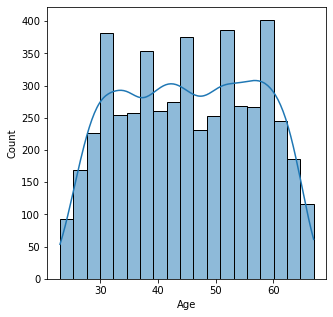

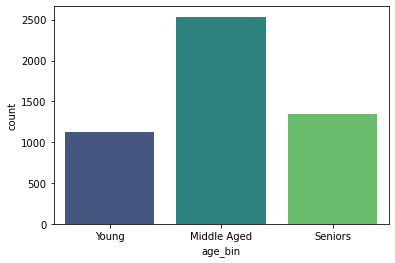

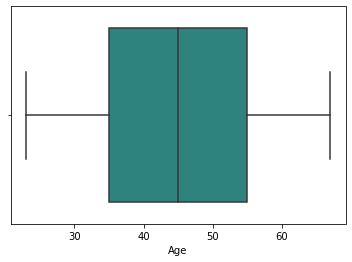

<IPython.core.display.Javascript object>

In [40]:
# plotting histplot and boxplot for Age and countplots for age bins
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=pdata, x="Age", kde=True)
plt.show()
ax = sns.countplot(data=pdata, x="age_bin", palette="viridis")
plt.show()
ax = sns.boxplot(data=pdata, x="Age", palette="viridis")
plt.show()

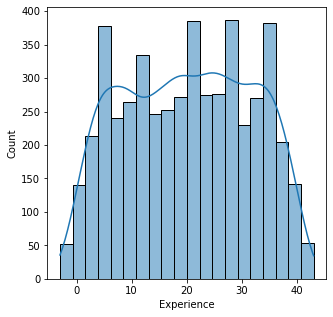

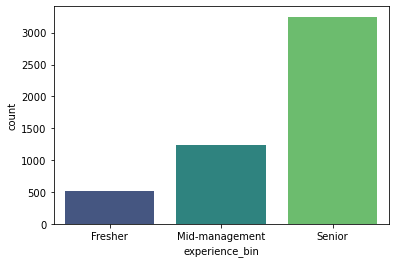

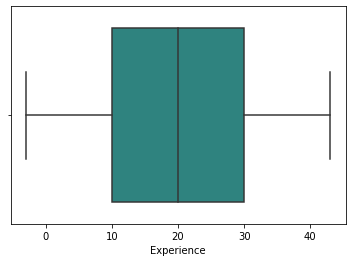

<IPython.core.display.Javascript object>

In [41]:
# plotting histplot and boxplot for Experience and countplots for experience bins
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=pdata, x="Experience", kde=True)
plt.show()
ax = sns.countplot(data=pdata, x="experience_bin", palette="viridis")
plt.show()
ax = sns.boxplot(data=pdata, x="Experience", palette="viridis")
plt.show()

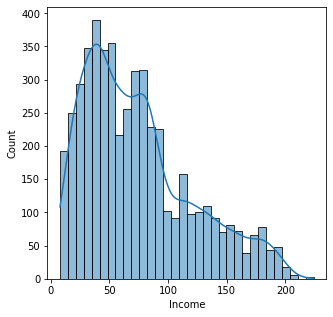

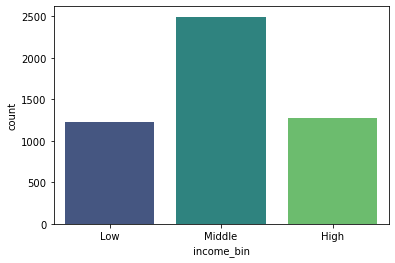

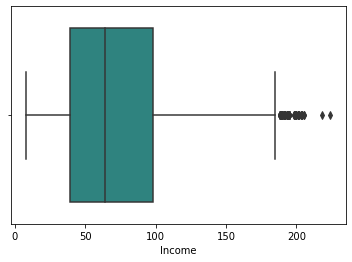

<IPython.core.display.Javascript object>

In [42]:
# plotting histplot and boxplot for Income and countplots for income bins
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=pdata, x="Income", kde=True)
plt.show()
ax = sns.countplot(data=pdata, x="income_bin", palette="viridis")
plt.show()
ax = sns.boxplot(data=pdata, x="Income", palette="viridis")
plt.show()

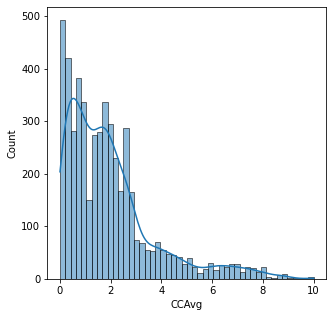

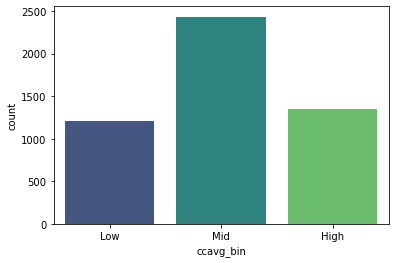

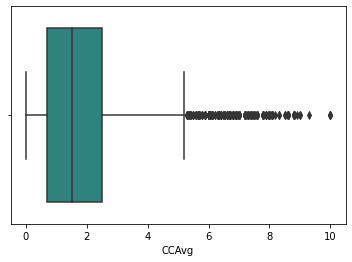

<IPython.core.display.Javascript object>

In [43]:
# plotting histplot and boxplot for CCAvg and countplots for ccavg bins
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=pdata, x="CCAvg", kde=True)
plt.show()
ax = sns.countplot(data=pdata, x="ccavg_bin", palette="viridis")
plt.show()
ax = sns.boxplot(data=pdata, x="CCAvg", palette="viridis")
plt.show()

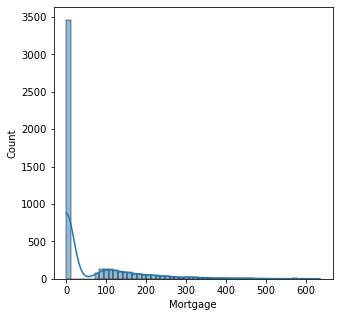

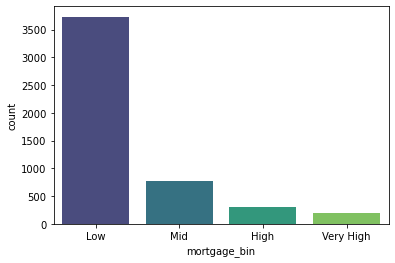

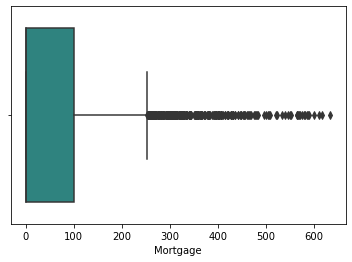

<IPython.core.display.Javascript object>

In [44]:
# plotting histplot and boxplot for Mortgage and countplots for mortgage bins
plt.figure(figsize=(5, 5))
ax = sns.histplot(data=pdata, x="Mortgage", kde=True)
plt.show()
ax = sns.countplot(data=pdata, x="mortgage_bin", palette="viridis")
plt.show()
ax = sns.boxplot(data=pdata, x="Mortgage", palette="viridis")
plt.show()

##### <span style="color:blue">Observations</span>
1. Income ranges from 8,000 to 224000 dollars, with the median income being 64000 dollars. Most customers fall into the middle class income levels.
2. Median age is 45 years, minimum age is 23 years and maximum age is 67 years. Middle-aged customers are higher in this dataset.
3. Median experience is 20 years, maximum being 43 years. Majority of the customers in the dataset belong have very senior level experience.
4. There are outliers in CCAvg, Mortgage and Income columns. 
5. Average credit card spending is 1500 dollars. Most customers have moderate spending on their credit cards.
6. Mean mortgage value is approximately 56,500 dollars. Most customers do not have any mortgage, but of the customers that have mortgages, they are on a moderate level.
7. Income, CCAvg and Mortgage are right skewed.

#### Multivariate Analysis

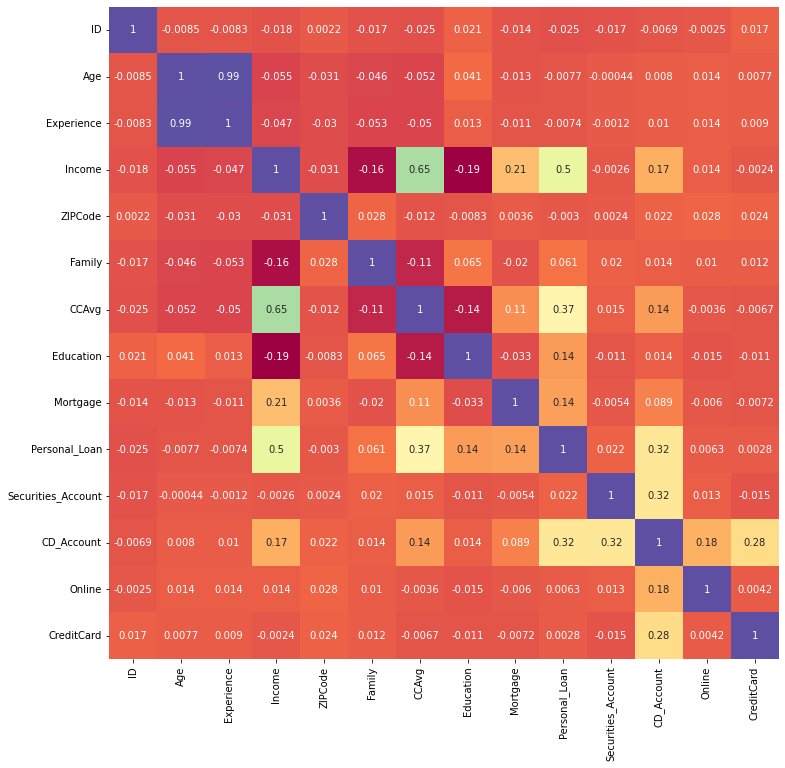

<IPython.core.display.Javascript object>

In [45]:
# plotting correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(pdata.corr(), annot=True, cmap="Spectral", cbar=False)
plt.show()

##### <span style="color:blue">Observations</span>
1. Age and Experience have the highest correlation(0.99), which makes sense since as Age increases, we tend to accumulate Experience.
2. Income and average CC spending is also highly correlated (0.65).
3. Income and Personal_Loan are also correlated (0.5).
4. There are some feeble correlations between CCAvg and Personal_Loan(0.37).
5. CD_Account, Securities_Account are also slightly correlated with Personal_Loan (0.32). 

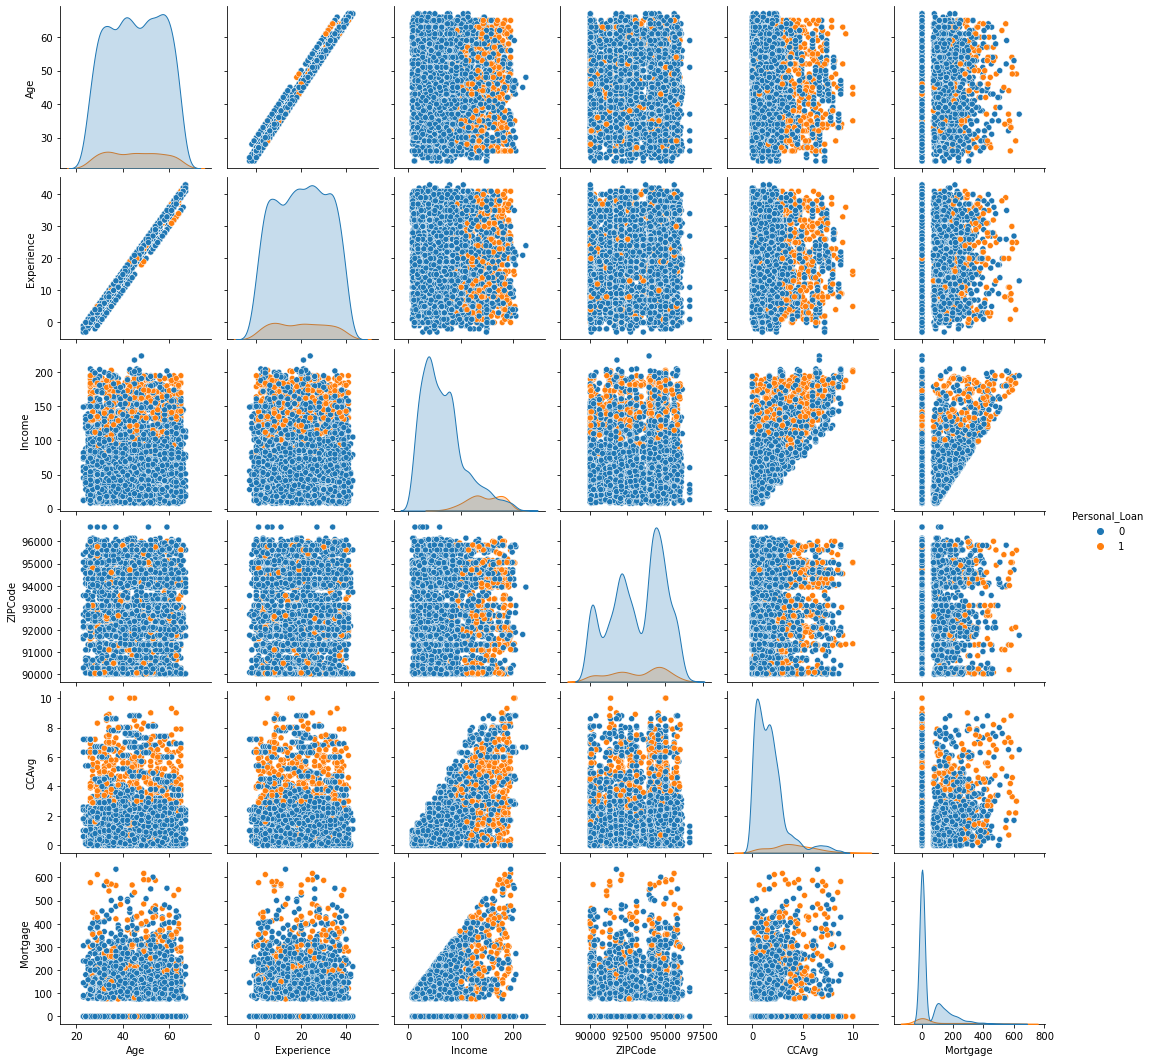

<IPython.core.display.Javascript object>

In [46]:
# plotting the pairplots to understand correlations and distributions between the numerical variables.
sns.pairplot(
    pdata,
    x_vars=["Age", "Experience", "Income", "ZIPCode", "CCAvg", "Mortgage"],
    y_vars=["Age", "Experience", "Income", "ZIPCode", "CCAvg", "Mortgage"],
    diag_kind="kde",
    hue="Personal_Loan",
)
plt.show()

##### <span style="color:blue">Observations</span>
1. Age and Experience are normally distributed and positively correlated, whereas Income, CCAvg and Mortgage are positively skewed. 
2. ZipCode does not seem to have any correlation with the other variables. 

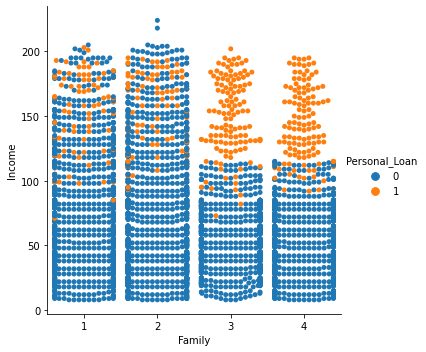

<IPython.core.display.Javascript object>

In [47]:
# plotting the relationship between Income and Family based on Personal Loan
sns.catplot(x="Family", y="Income", hue="Personal_Loan", data=pdata, kind="swarm")
plt.show()

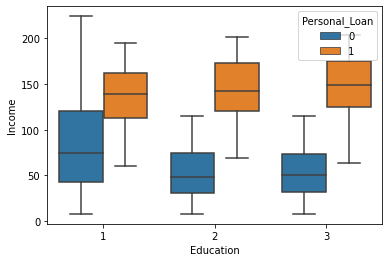

<IPython.core.display.Javascript object>

In [48]:
# plotting the relationship between Income and Education based on Personal Loan
sns.boxplot(x="Education", y="Income", hue="Personal_Loan", data=pdata)
plt.show()

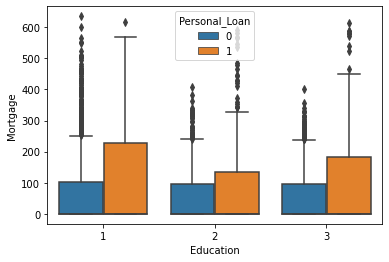

<IPython.core.display.Javascript object>

In [49]:
# plotting the relationship between Education and Mortgage based on Personal Loan
sns.boxplot(x="Education", y="Mortgage", hue="Personal_Loan", data=pdata)
plt.show()

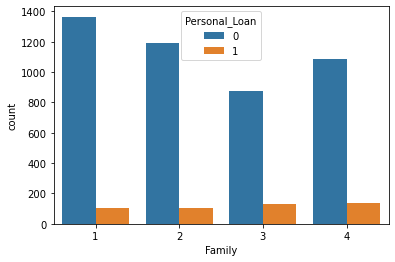

<IPython.core.display.Javascript object>

In [50]:
# plotting the relationship between Family and Personal Loan
sns.countplot(x="Family", data=pdata, hue="Personal_Loan")
plt.show()

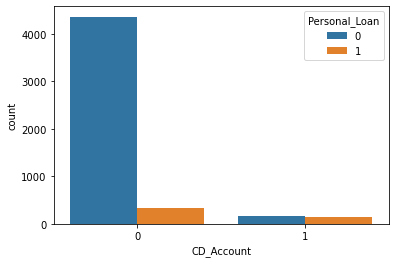

<IPython.core.display.Javascript object>

In [51]:
# plotting the relationship between CD Account and Personal Loan
sns.countplot(x="CD_Account", data=pdata, hue="Personal_Loan")
plt.show()

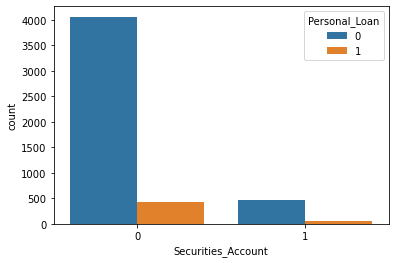

<IPython.core.display.Javascript object>

In [52]:
# plotting the relationship between Securities Account and Personal Loan
sns.countplot(x="Securities_Account", data=pdata, hue="Personal_Loan")
plt.show()

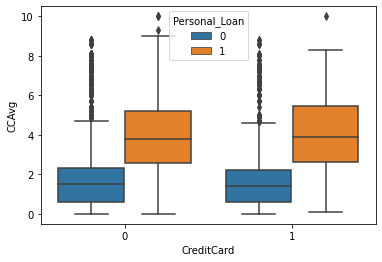

<IPython.core.display.Javascript object>

In [53]:
# plotting the relationship between Credit Card and CCAvg based on Personal Loan
sns.boxplot(x="CreditCard", y="CCAvg", hue="Personal_Loan", data=pdata)
plt.show()

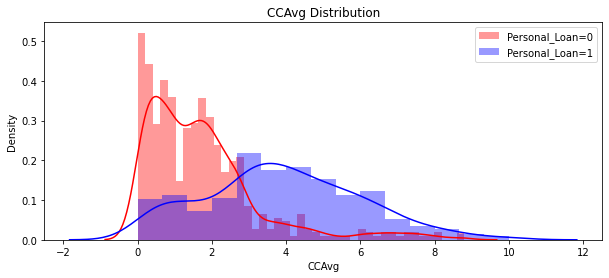

<IPython.core.display.Javascript object>

In [54]:
# plotting the distribution of Personal Loan against CCAvg
plt.figure(figsize=(10, 4))
sns.distplot(
    pdata[pdata["Personal_Loan"] == 0]["CCAvg"], color="r", label="Personal_Loan=0"
)
sns.distplot(
    pdata[pdata["Personal_Loan"] == 1]["CCAvg"], color="b", label="Personal_Loan=1"
)
plt.legend()
plt.title("CCAvg Distribution")
plt.show()

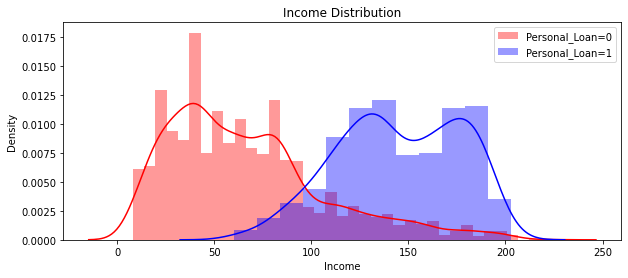

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(10, 4))
sns.distplot(
    pdata[pdata["Personal_Loan"] == 0]["Income"], color="r", label="Personal_Loan=0"
)
sns.distplot(
    pdata[pdata["Personal_Loan"] == 1]["Income"], color="b", label="Personal_Loan=1"
)
plt.legend()
plt.title("Income Distribution")
plt.show()

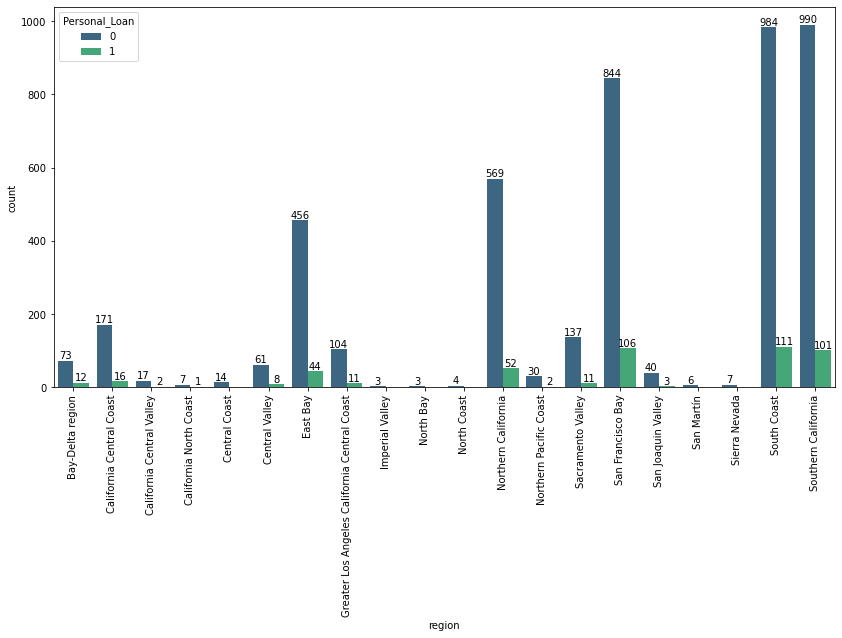

<IPython.core.display.Javascript object>

In [56]:
# plotting countplot for the region vs Personal Loan
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=pdata, x="region", hue="Personal_Loan", palette="viridis")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=90)
plt.show()

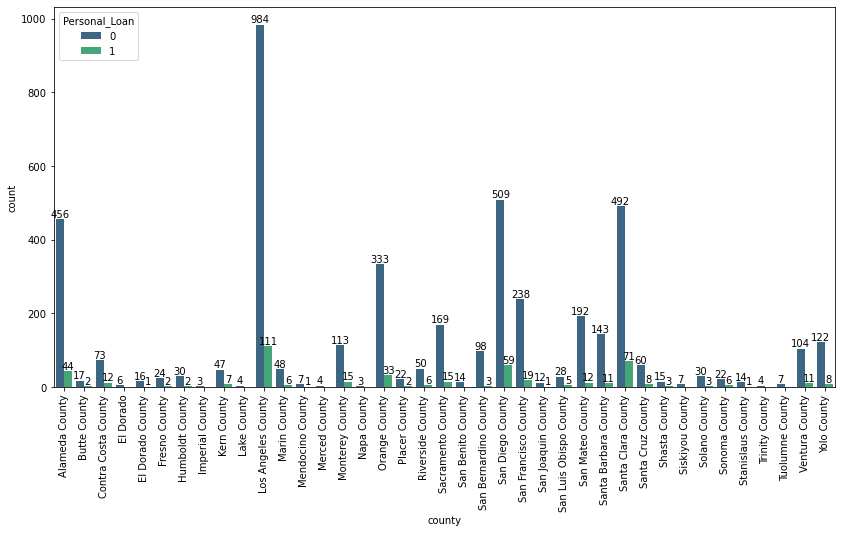

<IPython.core.display.Javascript object>

In [57]:
# plotting countplot for the county vs Personal Loan
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=pdata, x="county", hue="Personal_Loan", palette="viridis")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=90)
plt.show()

##### <span style="color:blue">Observations</span>

1. Families with members 3 & above tend to purchase personal loans, especially when their income is above 100,000. 
2. Customers with advanced education (level 3) tend to purchase personal loans and their median income is significantly higher than their peers with the same education. For example, a Level 3 educated, non-purchaser customer has median income closer to 50,000, whereas a Level 3 educated, borrower has median income around 150,000. 
3. Undergrad customers who purchase personal loan tend to have a higher mortgage, than customers with higher education levels.
4. Family, CD Accounts or Securities Accounts don't seem to have a significant influence on purchasing personal loans.
5. Customers who have a credit card and have purchased personal loans tend to have a higher average spending on their credit cards
6. Most personal loans were taken in the region of South Coast (111), immediately followed by Southern California (101). 
7. Los Angeles County topped the number of loan borrowers, followed by Santa Clara county. 

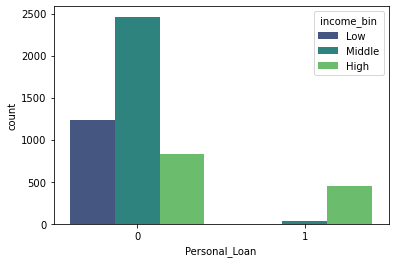

<IPython.core.display.Javascript object>

In [58]:
# plotting the countplot of Personal Loan against income bins
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="income_bin")
plt.show()

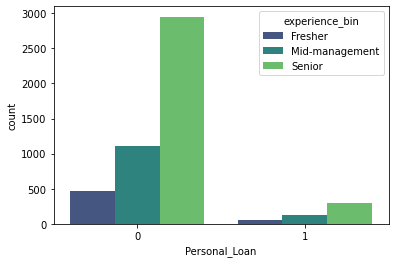

<IPython.core.display.Javascript object>

In [59]:
# plotting the countplot of Personal Loan against experience bins
ax = sns.countplot(
    data=pdata, x="Personal_Loan", palette="viridis", hue="experience_bin"
)
plt.show()

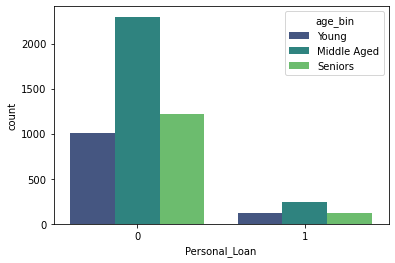

<IPython.core.display.Javascript object>

In [60]:
# plotting the countplot of Personal Loan against age bins
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="age_bin")
plt.show()

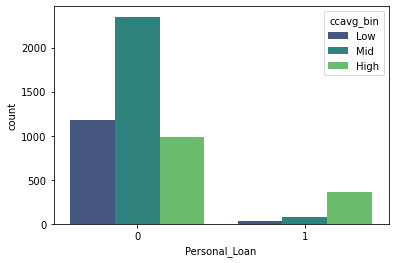

<IPython.core.display.Javascript object>

In [61]:
# plotting the countplot of Personal Loan against CCAvg
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="ccavg_bin")
plt.show()

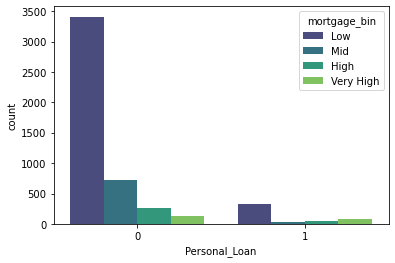

<IPython.core.display.Javascript object>

In [62]:
# plotting the countplot of Personal Loan against Mortgage
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="mortgage_bin")
plt.show()

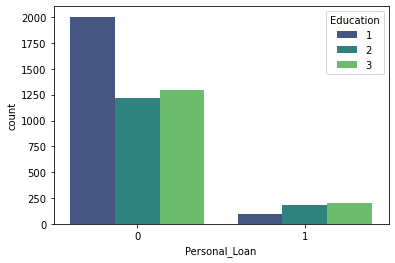

<IPython.core.display.Javascript object>

In [63]:
# plotting the countplot of Personal Loan against Education
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="Education")
plt.show()

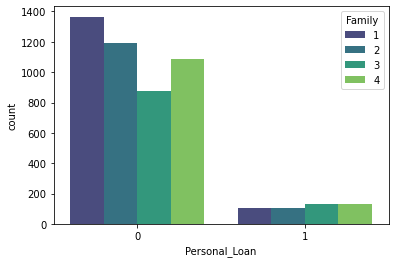

<IPython.core.display.Javascript object>

In [64]:
# plotting the countplot of Personal Loan against Family
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="Family")
plt.show()

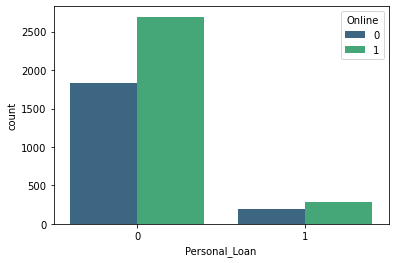

<IPython.core.display.Javascript object>

In [65]:
# plotting the countplot of Personal Loan against Online
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="Online")
plt.show()

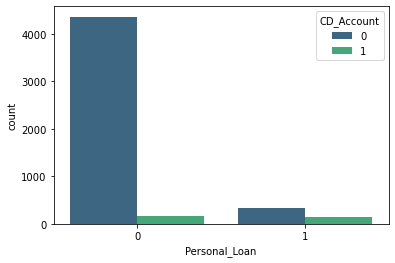

<IPython.core.display.Javascript object>

In [66]:
# plotting the countplot of Personal Loan against CD Account
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="CD_Account")
plt.show()

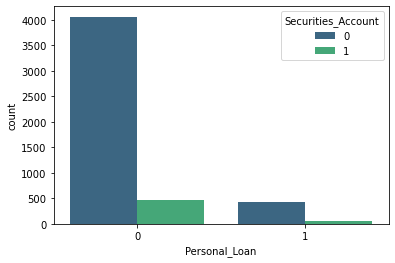

<IPython.core.display.Javascript object>

In [67]:
# plotting the countplot of Personal Loan against Securities Account
ax = sns.countplot(
    data=pdata, x="Personal_Loan", palette="viridis", hue="Securities_Account"
)
plt.show()

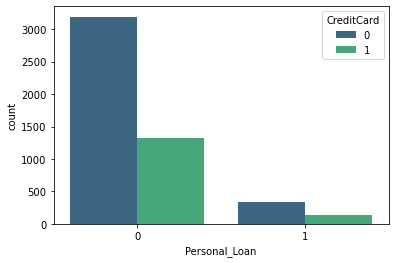

<IPython.core.display.Javascript object>

In [68]:
# plotting the countplot of Personal Loan against Credit Card
ax = sns.countplot(data=pdata, x="Personal_Loan", palette="viridis", hue="CreditCard")
plt.show()

##### <span style="color:blue">Observations</span>
1. Personal Loans have been purchased mostly by high income, middle-aged customers, who have very long work experience, higher CC spending and very low mortgages than customers in other groups. 
2. Customers with advanced level of education purchase most personal Loans
3. Customers who purchase personal loans have mostly 3 or 4 member families. 
4. Most customers who purchase personal loans have an online account with their bank.
5. Customers who do not have a personal loan, tend to buy a credit card more than customer who have a personal loan

### Error Corrections
Let's check the negative values in the Experience column and see how this can be treated.

In [69]:
pdata[pdata["Experience"] < 0].shape

(52, 21)

<IPython.core.display.Javascript object>

There are 52 rows where Experience is negative. Experience can be related to Age and Education, so we can find out the rows where Experience is positive and compute the median of Experience, where Age and Education is the same. In case, if positive experiences return as empty, then we can check the cases of negative experiences where Age and Education is same. 

In [70]:
# first assign the positive experience rows to a new dataframe
# assign the negative experience rows to another dataframe
# IDs of customers with negative experience are assigned to a thrid dataframe

pdata_Positive_Experience = pdata[pdata["Experience"] > 0]
pdata_Negative_Experience = pdata[pdata["Experience"] < 0]
pdata_Negative_Experience_List = pdata_Negative_Experience["ID"].tolist()

<IPython.core.display.Javascript object>

In [71]:
# for every id in the negative ID list, assign the age value against that ID to age_values dataframe
# for every id in the negative ID list, assign the education value against that ID to education_values dataframe
# if the age_value and education_value exist in the pdata_Positive_Experience, then assign that row to the positive_Experience filtered dataframe
# perform the same step with the negative experiences dataframe as well
# find the median of experience from positive_Experience_Filtered and assign it to exp and assign this to the main df where ID belongs to the negative experience
# if positive_Experience_Filtered is empty, then perform the same steps with the filtered negative experience df in step #3


for id in pdata_Negative_Experience_List:
    age_values = pdata.loc[np.where(pdata["ID"] == id)]["Age"].tolist()[0]
    education_values = pdata.loc[np.where(pdata["ID"] == id)]["Education"].tolist()[0]
    positive_Experience_Filtered = pdata_Positive_Experience[
        (pdata_Positive_Experience["Age"] == age_values)
        & (pdata_Positive_Experience["Education"] == education_values)
    ]
    if positive_Experience_Filtered.empty:
        negative_Experience_Filtered = pdata_Negative_Experience[
            (pdata_Negative_Experience["Age"] == age_values)
            & (pdata_Negative_Experience["Education"] == education_values)
        ]
        exp = round(negative_Experience_Filtered["Experience"].median())
    else:
        exp = round(positive_Experience_Filtered["Experience"].median())
    pdata.loc[pdata.loc[np.where(pdata["ID"] == id)].index, "Experience"] = abs(exp)

<IPython.core.display.Javascript object>

In [72]:
pdata[pdata["Experience"] < 0].shape

(0, 21)

<IPython.core.display.Javascript object>

All negative experience values have been treated. 

#### Outlier Detection and Treatment

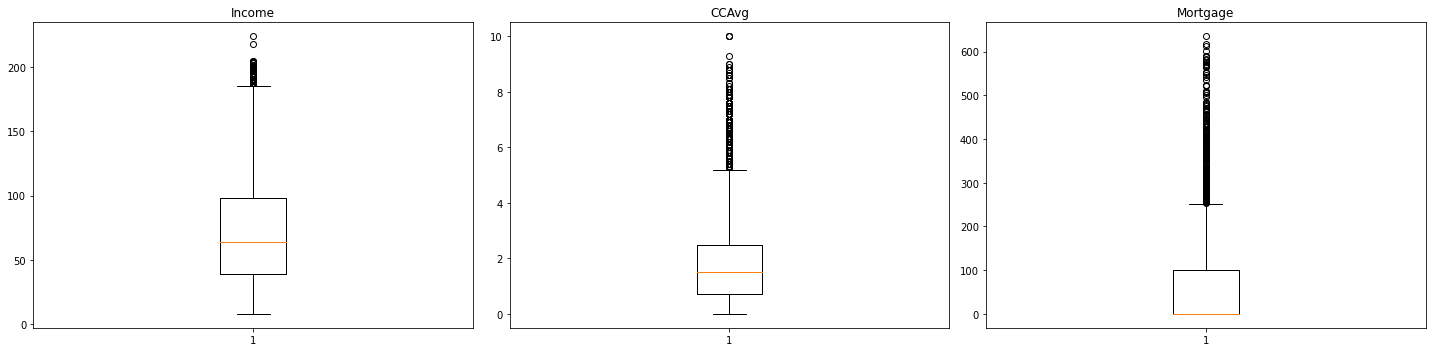

<IPython.core.display.Javascript object>

In [73]:
# outlier detection using boxplot
# from our EDA steps above, we have already seen outliers existing in Income, CCAvg and Mortgage columns
# plotting boxplots for these columns
numerical_col = ["Income", "CCAvg", "Mortgage"]
plt.figure(figsize=(20, 5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(pdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [74]:
# calculating the Q3 values above which outliers exist
for col in numerical_col:
    quartiles = np.quantile(pdata[col], [0.25, 0.75])
    # multiplying with 1000 since all values are in thousands
    Q3 = quartiles[1] * 1000
    print("Outlier values of", col, "are greater than", f"{Q3}")

Outlier values of Income are greater than 98000.0
Outlier values of CCAvg are greater than 2500.0
Outlier values of Mortgage are greater than 101000.0


<IPython.core.display.Javascript object>

Outliers exist towards the higher side of Income, CCAvg and Mortgage. Before we proceed to treat our outliers, there are some assumptions we must keep in mind:
- While the dataset contains information about income, it does not throw any light on the professions of the customers or the number of jobs they hold. 
- We also do not have any insights about the CC spending of these customers - what they purchase, how often they purchase, and etc
- The purpose of Mortgage is also unknown, whether it is personal, or for buying a house or for renovating one. 
- We also do not know the timelines in which this data was collected, whether it was pre-pandemic or post. This could affect our research, e.g.: during the pandemic, more customers purchased houses, cars and made lifestyle changes like moving to the suburbs. Therefore in the period from 2020 to 2022, average mortgage sizes increased than during the years before. 

Our research helps to understand the following about US Markets:
- Atleast 33% of Americans earn 100,000USD annually.Surgeons and medical specialists can earn as high as 300,000K. 
- During the period November 2020 to October 2021, an average American spends close to 4,800 monthly on credit cards. (Source: visualcapitalist.com)
- Average mortgage sizes went as high as 460,000 during the pandemic years. 

That said, except for Income, the other two columns seem to have really high values and we will need to treat these outliers. We can treat these outliers by assigning outliers to the whiskers, i.e., all values smaller than the Lower Whisker is assigned the value of the Lower Whisker and all values greater than the Upper Whisker will be assigned the Upper Whisker.  

In [75]:
# define a function to identify and treat outliers in a variable


def find_whiskers(data, col):
    """
    col: str, name of the numerical variable
    data: data frame
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return data


# define a function to apply the above function to a list of numerical columns
def treat_outliers(data, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical variables
    data: data frame
    """
    for c in col_list:
        data = find_whiskers(data, c)

    return data

<IPython.core.display.Javascript object>

In [76]:
# removing Income since we are not treating it
numerical_col.remove("Income")

# treating outliers using the defined function
data_loan = treat_outliers(pdata, numerical_col)

<IPython.core.display.Javascript object>

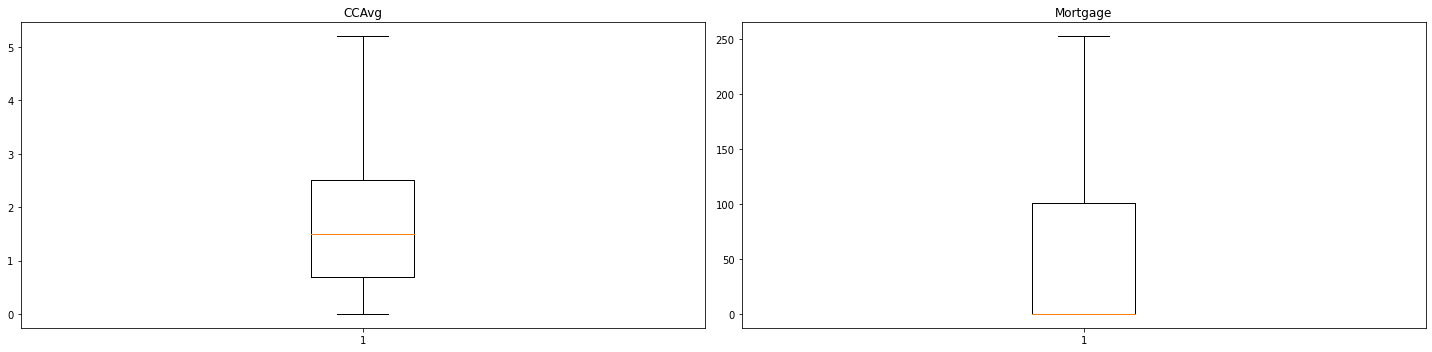

<IPython.core.display.Javascript object>

In [77]:
# verifying if outliers have been treated
plt.figure(figsize=(20, 5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1, 2, i + 1)
    plt.boxplot(pdata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##### <span style="color:blue">Observations</span>
Outliers in the CCAvg and Mortgage columns have been treated.

#### Feature Scaling

The columns Income, CCAvg and Mortgage are on different scales and it would be better if we can perform feature scaling. Since outliers have been treated and  the distributions are skewed, we can use MinMax scaling on these features

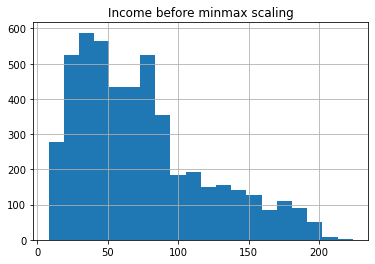

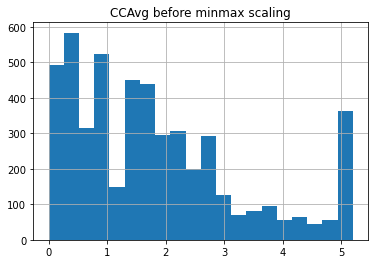

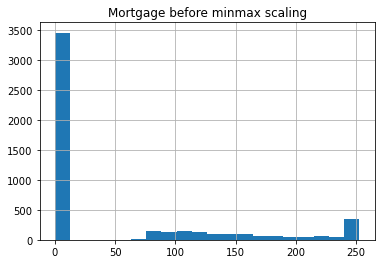

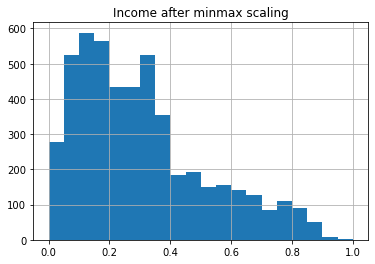

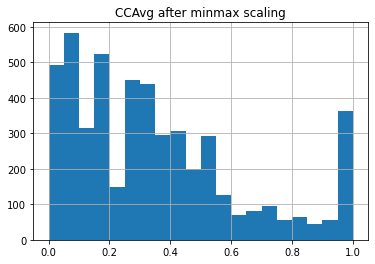

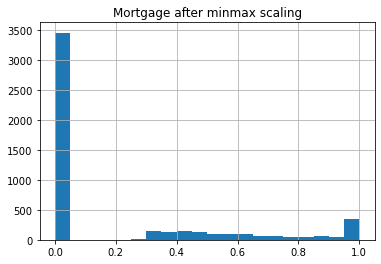

<IPython.core.display.Javascript object>

In [78]:
# let's first view the original scaling on these variables
pdata["Income"].hist(bins=20)
plt.title("Income before minmax scaling")
plt.show()
pdata["CCAvg"].hist(bins=20)
plt.title("CCAvg before minmax scaling")
plt.show()
pdata["Mortgage"].hist(bins=20)
plt.title("Mortgage before minmax scaling")
plt.show()

# perform MinMax scaling
pdata[["Income", "CCAvg", "Mortgage"]] = MinMaxScaler().fit_transform(
    pdata[["Income", "CCAvg", "Mortgage"]]
)

# check the scaling after applying MinMax scaling
pdata["Income"].hist(bins=20)
plt.title("Income after minmax scaling")
plt.show()
pdata["CCAvg"].hist(bins=20)
plt.title("CCAvg after minmax scaling")
plt.show()
pdata["Mortgage"].hist(bins=20)
plt.title("Mortgage after minmax scaling")
plt.show()

### Model Building

Let us start to build our models using Logistic Regression and Decision Trees. At the end of our analyses, we will see which model fared better.

### Model Evaluation Criterion

When we build the model, the following outcomes can be wrongly predicted:
- Predicting a customer will purchase a loan, but actually will not. ((False Positive Case))
- Predicting a customer will  not purchase a loan, but actually will. ((False Negative Case))

<b>Which case is more important?</b>

When we predict a customer will purchase a loan but actually does not, it is a *loss of resource*. When we predict a customer will not purchase a loan but actually will, it is a *loss of opportunity*. When a bank like AllLife Bank is trying to grow their customer base and generate revenues, missing out on a potential customer is a severe loss.

<b>Objective of the model</b>

Therefore, the objective of the model is to reduce the loss of opportunity, i.e., false negatives. This means Recall should be maximised. Greater the Recall, greater the chance of identifying a customer who will purchase a loan



### Data Preparation

ID and ZipCode are columns that are not relevant to our model building so we can drop it. Since we have completed our EDA, we can also drop the county column, as well as all the bins columns and build all our models using region. 

In [79]:
pdata = pdata.drop(["ID", "ZIPCode", "county"], axis=1)

<IPython.core.display.Javascript object>

In [80]:
pdata = pdata.drop(
    ["income_bin", "age_bin", "experience_bin", "ccavg_bin", "mortgage_bin"], axis=1
)

<IPython.core.display.Javascript object>

During the EDA, we identified that Age and Experience have the highest correlation. We can also drop one of these columns, as using both in classification models can tend to weaken/destabilize our model.

In [81]:
pdata = pdata.drop(["Experience"], axis=1)

<IPython.core.display.Javascript object>

In [82]:
pdata.head(1)

Age    Income  Family     CCAvg  Education  Mortgage  Personal_Loan  \
0   25  0.189815       4  0.307692          1       0.0              0   

   Securities_Account  CD_Account  Online  CreditCard       region  
0                   1           0       0           0  South Coast

<IPython.core.display.Javascript object>

The columns ID, ZipCode, county, Experience and all the bin columns have been dropped.

#### Understanding the split of positive and negative cases 

We will begin with understanding the split of true and false cases in the dataset.

In [83]:
n_true = len(pdata.loc[pdata["Personal_Loan"] == True])
n_false = len(pdata.loc[pdata["Personal_Loan"] == False])
print(
    "Number of true cases: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of false cases: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


<IPython.core.display.Javascript object>

We can see that our dataset is highly imbalanced, with false classes present in 90% of cases. This means that our models will tend to predicting most cases as false, therefore accuracy scores of models may not be a good metric to rely on. During model building, we will take a few steps to offset these imbalances.

#### Splitting the data  and One hot encoding 
We will use 70% of data for training and 30% for testing and then verify the proportions in the split datasets. 

In [84]:
# creating dataframes of independent variables and dependent variables
X = pdata.drop('Personal_Loan',axis=1)     
y = pdata['Personal_Loan']   

#creating dummy values only for Education, region and Family as these are the only non-binary categorical columns
X = pd.get_dummies(X, columns=['Education', 'region','Family'], drop_first=True)

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


<IPython.core.display.Javascript object>

In [85]:
# Let's check split of data
print(
    "{0:0.2f}% data is in training set".format((len(X_train) / len(pdata.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(X_test) / len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


<IPython.core.display.Javascript object>

In [86]:
# printing the percentage of true values in the Personal_Loan column in the original dataset
print(
    "Original Personal_Loan True Values    : {0} ({1:0.2f}%)".format(
        len(pdata.loc[pdata["Personal_Loan"] == 1]),
        (len(pdata.loc[pdata["Personal_Loan"] == 1]) / len(pdata.index)) * 100,
    )
)

# printing the percentage of false values in the Personal_Loan column in the original dataset
print(
    "Original Personal_Loan False Values   : {0} ({1:0.2f}%)".format(
        len(pdata.loc[pdata["Personal_Loan"] == 0]),
        (len(pdata.loc[pdata["Personal_Loan"] == 0]) / len(pdata.index)) * 100,
    )
)
print("")

# printing the percentage of true values in the y_train dataset
print(
    "Training Personal_Loan True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
# printing the percentage of false values in the y_train dataset
print(
    "Training Personal_Loan False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
# printing the percentage of true values in the y_test dataset
print(
    "Test Personal_Loan True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
# printing the percentage of false values in the y_test dataset
print(
    "Test Personal_Loan False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Personal_Loan True Values    : 480 (9.60%)
Original Personal_Loan False Values   : 4520 (90.40%)

Training Personal_Loan True Values    : 331 (9.46%)
Training Personal_Loan False Values   : 3169 (90.54%)

Test Personal_Loan True Values        : 149 (9.93%)
Test Personal_Loan False Values       : 1351 (90.07%)



<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
The dataset has been split into 7:3 train-to-test ratio. The original dataset, training datasets and test datasets now contain true-to-false values in the ratio ~9:1. 

### Model Evaluation functions

Before we proceed into model building, we can define some functions to calculate model scores. 

In [87]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
# calculates accuracy, recall, precision and f1 score
# we can use the default threshold=0.5 to define the function, but can change it when it is actually invoked.


def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [88]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    name: whether testing or training
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = metrics.confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression

<b>Logistic Model # 1: A default model</b>

In [89]:
# using solver = newton-cg as it is faster for high-dimensional data

log_model1 = LogisticRegression(solver="newton-cg", random_state=1)
lg1 = log_model1.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Confusion Matrix | Model: 1 | Threshold : 0.5 |Dataset : Train


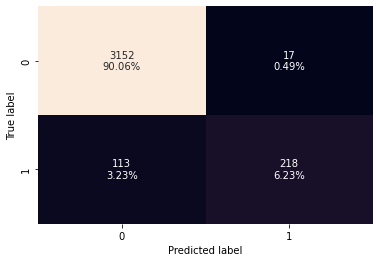

<IPython.core.display.Javascript object>

In [90]:
print("Confusion Matrix | Model: 1 | Threshold : 0.5 |Dataset : Train")
confusion_matrix_sklearn_with_threshold(lg1, X_train, y_train)

Confusion Matrix | Model: 1 | Threshold : 0.5 |Dataset :Test


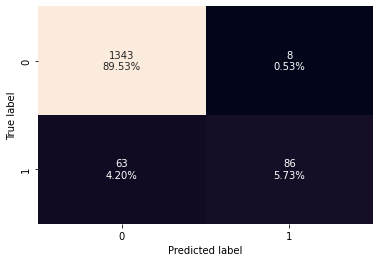

<IPython.core.display.Javascript object>

In [91]:
print("Confusion Matrix | Model: 1 | Threshold : 0.5 |Dataset :Test")
confusion_matrix_sklearn_with_threshold(lg1, X_test, y_test)

In [92]:
print("Performance Metrics | Model: 1 | Threshold : 0.5 |Dataset : Training")
LogModelTrain = model_performance_classification(lg1, X_train, y_train)
LogModelTrain

Performance Metrics | Model: 1 | Threshold : 0.5 |Dataset : Training


Accuracy   Recall  Precision        F1
0  0.962857  0.65861    0.92766  0.770318

<IPython.core.display.Javascript object>

In [93]:
print("Performance Metrics | Model: 1 | Threshold : 0.5 |Dataset : Test")
LogModelTest = model_performance_classification(lg1, X_test, y_test)
LogModelTest

Performance Metrics | Model: 1 | Threshold : 0.5 |Dataset : Test


Accuracy    Recall  Precision        F1
0  0.952667  0.577181   0.914894  0.707819

<IPython.core.display.Javascript object>

<b> Plotting ROC-AUC curve for Logistic Regression Model #1 </b>

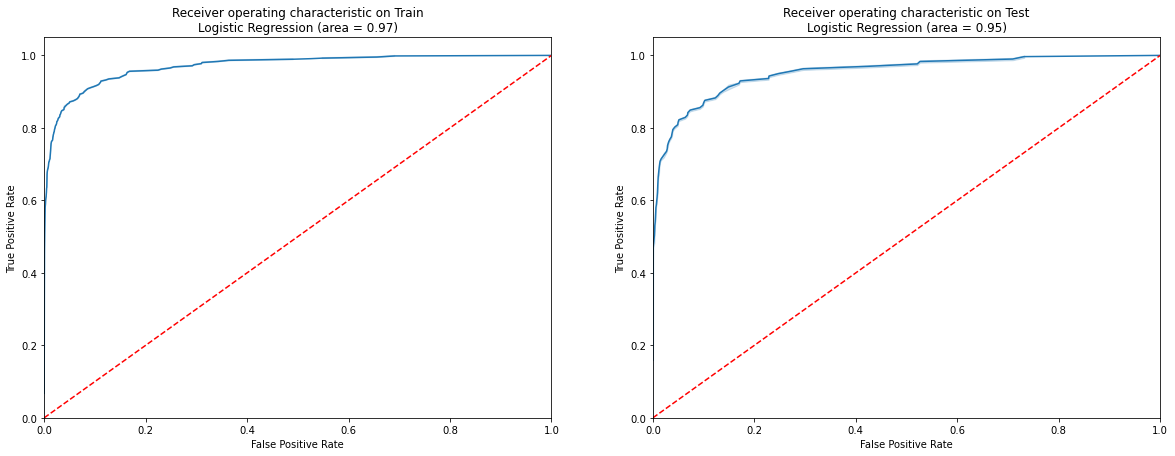

<IPython.core.display.Javascript object>

In [94]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))

logit_roc_auc_train = roc_auc_score(y_train, lg1.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict_proba(X_train)[:,1])
sns.lineplot(fpr, tpr, ax=axes[0]).set(title = 'Receiver operating characteristic on Train\nLogistic Regression (area = %0.2f)' % logit_roc_auc_train)
axes[0].plot([0, 1], [0, 1],'r--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')

logit_roc_auc_test = roc_auc_score(y_test, lg1.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, ax=axes[1]).set(title = 'Receiver operating characteristic on Test\nLogistic Regression (area = %0.2f)' % logit_roc_auc_test)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
plt.show()


##### <span style="color:blue">Observations</span>
1. The logistic regression model is giving very high accuracy and the auc-roc curve is also promising. However, the recall is very poor - 65% on training and 57% on test. This model needs improving.
2. This target variable is highly imbalanced, in the ratio of approximately 9:1. This means that our model will tend to always predict the outcome to be false, which is undesirable. 
3. We can improve this model by adding class weights. 

<b>Logistic Regression Model #2: Lower Thresholds</b>

Let's try to build a model with lower thresholds as it is one way of improving recall. Let's use the threshold value as 0.2.

In [95]:
log_model2 = LogisticRegression(solver="newton-cg", random_state=1)
lglow = log_model2.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Confusion Matrix | Model:2 | Threshold : 0.2 | Dataset: Train


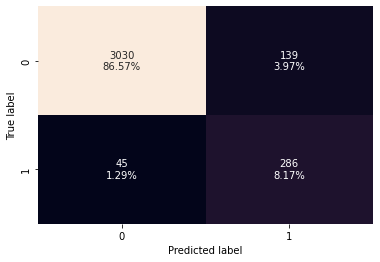

<IPython.core.display.Javascript object>

In [96]:
print("Confusion Matrix | Model:2 | Threshold : 0.2 | Dataset: Train")
confusion_matrix_sklearn_with_threshold(lglow, X_train, y_train, threshold=0.2)

Confusion Matrix | Model: 2 | Threshold : 0.2 | Test


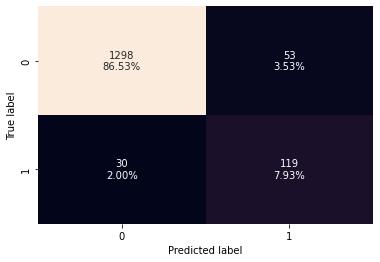

<IPython.core.display.Javascript object>

In [97]:
print("Confusion Matrix | Model: 2 | Threshold : 0.2 | Test")
confusion_matrix_sklearn_with_threshold(lglow, X_test, y_test, threshold=0.2)

In [98]:
print("Performance Metrics | Model: 2 | Threshold : 0.2 | Training")
LogModelLowThresTrain = model_performance_classification(
    lglow, X_train, y_train, threshold=0.2
)
LogModelLowThresTrain

Performance Metrics | Model: 2 | Threshold : 0.2 | Training


Accuracy    Recall  Precision        F1
0  0.947429  0.864048   0.672941  0.756614

<IPython.core.display.Javascript object>

In [99]:
print("Performance Metrics | Model: 2 | Threshold : 0.2 | Test")
LogModelLowThresTest = model_performance_classification(
    lglow, X_test, y_test, threshold=0.2
)
LogModelLowThresTest

Performance Metrics | Model: 2 | Threshold : 0.2 | Test


Accuracy    Recall  Precision        F1
0  0.944667  0.798658    0.69186  0.741433

<IPython.core.display.Javascript object>

<b> Plotting ROC-AUC curve for Logistic Regression Model #2 </b>

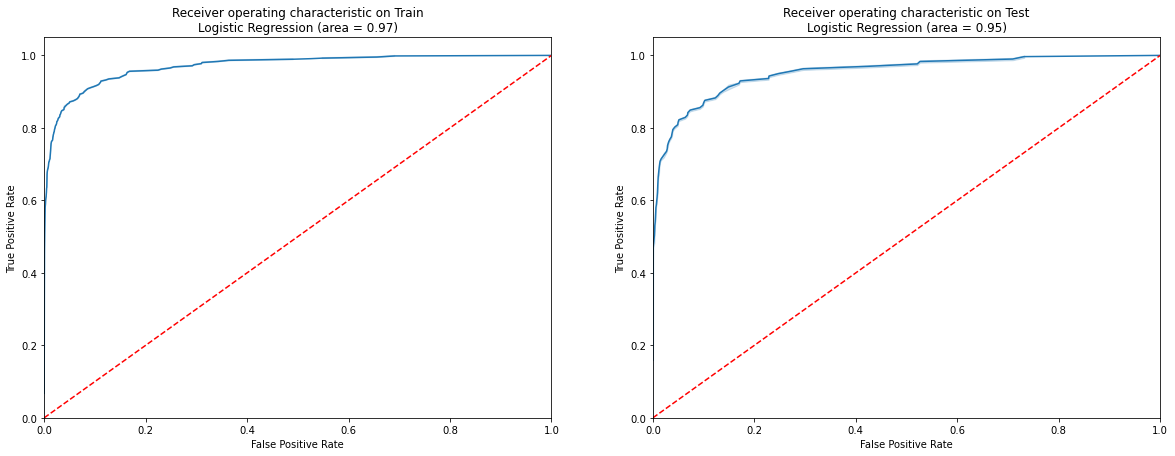

<IPython.core.display.Javascript object>

In [100]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))

logit_roc_auc_train = roc_auc_score(y_train, lglow.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lglow.predict_proba(X_train)[:,1])
sns.lineplot(fpr, tpr, ax=axes[0]).set(title = 'Receiver operating characteristic on Train\nLogistic Regression (area = %0.2f)' % logit_roc_auc_train)
axes[0].plot([0, 1], [0, 1],'r--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')

logit_roc_auc_test = roc_auc_score(y_test, lglow.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lglow.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, ax=axes[1]).set(title = 'Receiver operating characteristic on Test\nLogistic Regression (area = %0.2f)' % logit_roc_auc_test)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
plt.show()


##### <span style="color:blue">Observations</span>
1. Recall on this model has improved significantly, with 86% on the training and 79% on the test. 
2. However, we can try a few more attempts to improve this model

#### Logistic Regression Model #3: Building models with class weights

In the original dataset, the weights of 0:1 classes are in 0.904:0.096 ratios. We can introduce balance manually by inversing these weights for the classes or by using the inbuilt class_weight='balanced' in our logistic regression. Let's use the class_weight='balanced' and compute what are the ideal weights for our model


We can use the class_weight from sklearn(scikit-learn) to compute the weights of the class and then fit our model with the weights.

We will continue to use threshold = 0.2 as we obtained good results with this value.

In [101]:
# use class_weight="balanced" on the y_train dataset to compute the weights

class_weights = dict(
    zip(
        np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight="balanced", classes=np.unique(y_train), y=y_train
        ),
    )
)
class_weights

{0: 0.552224676554118, 1: 5.287009063444109}

<IPython.core.display.Javascript object>

When we use the class_weight='balanced'parameter, the weights are calculated to be 0.55 for 0 class and 5.28 for 1 class. Let us see how our new model fares when we fit with these class weights. 

In [102]:
# building model with balanced class weights
log_model2 = LogisticRegression(
    solver="newton-cg", class_weight={0: 0.552224676554118, 1: 5.287009063444109}
)
lg2 = log_model2.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Let's print the confusion matrix for this model

Confusion Matrix | Model: 3 | Threshold : 0.2 | Dataset: Training


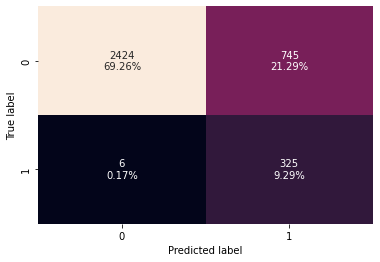

<IPython.core.display.Javascript object>

In [103]:
print("Confusion Matrix | Model: 3 | Threshold : 0.2 | Dataset: Training")
confusion_matrix_sklearn_with_threshold(lg2, X_train, y_train, threshold=0.2)

Confusion Matrix | Model: 3 | Threshold : 0.2 |Dataset: Test


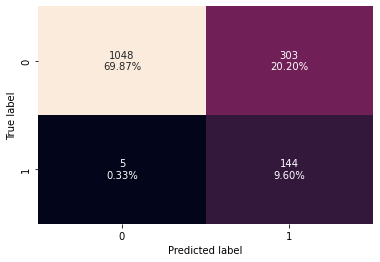

<IPython.core.display.Javascript object>

In [104]:
print("Confusion Matrix | Model: 3 | Threshold : 0.2 |Dataset: Test")
confusion_matrix_sklearn_with_threshold(lg2, X_test, y_test, threshold=0.2)

Let's print the Performance Metrics for this model

In [105]:
print("Performance Metrics | Model: 3 | Threshold : 0.2 |Dataset: Training")
LogModelBalancedTrain = model_performance_classification(
    lg2, X_train, y_train, threshold=0.2
)
LogModelBalancedTrain

Performance Metrics | Model: 3 | Threshold : 0.2 |Dataset: Training


Accuracy    Recall  Precision        F1
0  0.785429  0.981873   0.303738  0.463954

<IPython.core.display.Javascript object>

In [106]:
print("Performance Metrics | Model: 3 | Threshold : 0.2 |Dataset: Test")
LogModelBalancedTest = model_performance_classification(
    lg2, X_test, y_test, threshold=0.2
)
LogModelBalancedTest

Performance Metrics | Model: 3 | Threshold : 0.2 |Dataset: Test


Accuracy    Recall  Precision        F1
0  0.794667  0.966443   0.322148  0.483221

<IPython.core.display.Javascript object>

Let's plot the ROC-AUC curve for this model

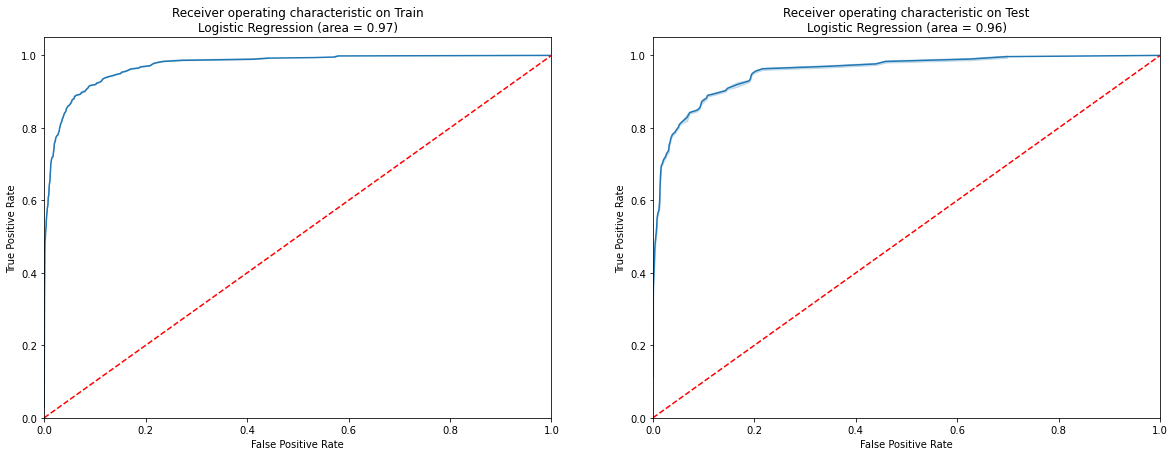

<IPython.core.display.Javascript object>

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

logit_roc_auc_train = roc_auc_score(y_train, lg2.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict_proba(X_train)[:, 1])
sns.lineplot(fpr, tpr, ax=axes[0]).set(
    title="Receiver operating characteristic on Train\nLogistic Regression (area = %0.2f)"
    % logit_roc_auc_train
)
axes[0].plot([0, 1], [0, 1], "r--")
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

logit_roc_auc_test = roc_auc_score(y_test, lg2.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict_proba(X_test)[:, 1])
sns.lineplot(fpr, tpr, ax=axes[1]).set(
    title="Receiver operating characteristic on Test\nLogistic Regression (area = %0.2f)"
    % logit_roc_auc_test
)
axes[1].plot([0, 1], [0, 1], "r--")
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
plt.show()

##### <span style="color:blue">Observations</span>
1. The balanced class weights have significantly improved the recall on the training set (98%) and test set (97%). The model has significantly improved.

#### Logistic Regression Model #4: Inversed Class Weights

We can try an alternate approach to balancing the class by inversing the current weights of the classes.
We will continue to use threshold = 0.2

In [108]:
# class weights are inversed, now weight for class 0 is smaller: 0.096.
# class weight for 1 is 0.90
log_model3 = LogisticRegression(
    solver="newton-cg", random_state=1, class_weight={0: 0.096, 1: 0.90}
)
lg3 = log_model3.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Let's print the confusion matrices and performances matrices for this model

Confusion Matrix | Model: 4 | Threshold : 0.2 | Dataset: Training


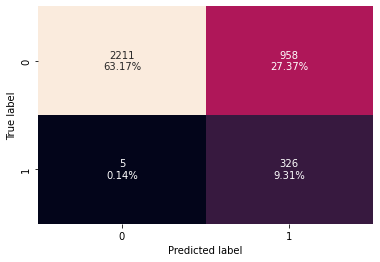

<IPython.core.display.Javascript object>

In [109]:
print("Confusion Matrix | Model: 4 | Threshold : 0.2 | Dataset: Training")
confusion_matrix_sklearn_with_threshold(lg3, X_train, y_train, threshold=0.2)

Confusion Matrix | Model: 4 | Threshold : 0.2 |Dataset: Test


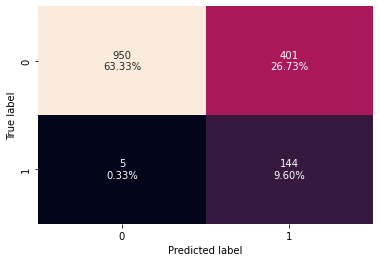

<IPython.core.display.Javascript object>

In [110]:
print("Confusion Matrix | Model: 4 | Threshold : 0.2 |Dataset: Test")
confusion_matrix_sklearn_with_threshold(lg3, X_test, y_test, threshold=0.2)

In [111]:
print("Performance Metrics | Model: 4 | Threshold : 0.2 | Dataset: Training")
LogModelInverseBalTrain = model_performance_classification(
    lg3, X_train, y_train, threshold=0.2
)
LogModelInverseBalTrain

Performance Metrics | Model: 4 | Threshold : 0.2 | Dataset: Training


Accuracy    Recall  Precision        F1
0  0.724857  0.984894   0.253894  0.403715

<IPython.core.display.Javascript object>

In [112]:
print("Performance Metrics | Model: 4 | Threshold : 0.2 |Dataset: Test")
LogModelInverseBalTest = model_performance_classification(
    lg3, X_test, y_test, threshold=0.2
)
LogModelInverseBalTest

Performance Metrics | Model: 4 | Threshold : 0.2 |Dataset: Test


Accuracy    Recall  Precision        F1
0  0.729333  0.966443    0.26422  0.414986

<IPython.core.display.Javascript object>

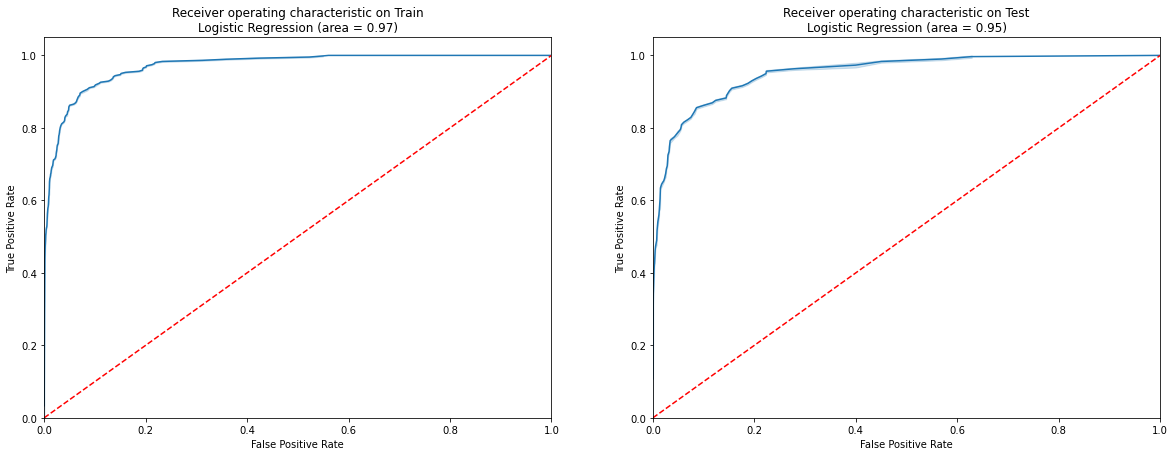

<IPython.core.display.Javascript object>

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

logit_roc_auc_train = roc_auc_score(y_train, lg3.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict_proba(X_train)[:, 1])
sns.lineplot(fpr, tpr, ax=axes[0]).set(
    title="Receiver operating characteristic on Train\nLogistic Regression (area = %0.2f)"
    % logit_roc_auc_train
)
axes[0].plot([0, 1], [0, 1], "r--")
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

logit_roc_auc_test = roc_auc_score(y_test, lg3.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict_proba(X_test)[:, 1])
sns.lineplot(fpr, tpr, ax=axes[1]).set(
    title="Receiver operating characteristic on Test\nLogistic Regression (area = %0.2f)"
    % logit_roc_auc_test
)
axes[1].plot([0, 1], [0, 1], "r--")
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
plt.show()

##### <span style="color:blue">Observations</span>
1. Recall has stayed almost consistent even after inversing class weights, indicating that class weights have not significantly improved our model as much as changing the threshold did.


#### Logistic Regression Models #5 & #6: Optimal Thresholds using AUC-ROC curves and Precision-Recall curves

In the next two models, let's revert to the default model (Model #1) and find the optimal threshold using the following:
1. AUC- ROC curve and
2. Precision - Recall curve.


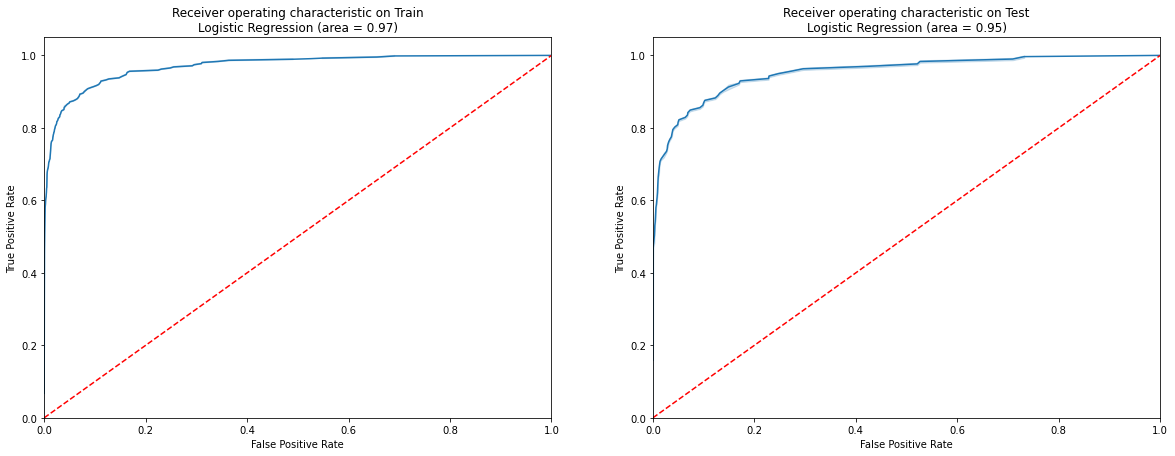

<IPython.core.display.Javascript object>

In [114]:
#plotting the AUC-ROC curve for the first model again

fig, axes = plt.subplots(1,2, figsize=(20, 7))

logit_roc_auc_train = roc_auc_score(y_train, lg1.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict_proba(X_train)[:,1])
sns.lineplot(fpr, tpr, ax=axes[0]).set(title = 'Receiver operating characteristic on Train\nLogistic Regression (area = %0.2f)' % logit_roc_auc_train)
axes[0].plot([0, 1], [0, 1],'r--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')

logit_roc_auc_test = roc_auc_score(y_test, lg1.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict_proba(X_test)[:,1])
sns.lineplot(fpr, tpr, ax=axes[1]).set(title = 'Receiver operating characteristic on Test\nLogistic Regression (area = %0.2f)' % logit_roc_auc_test)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
plt.show()


In [115]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1441731963564923


<IPython.core.display.Javascript object>

The optimal threshold as per the AUC - ROC curve is 0.144. Let's try to plot the confusion matrices and performance matrices with this threshold.

Confusion Matrix | Model: 5 | Threshold : 0.144 | Dataset: Training


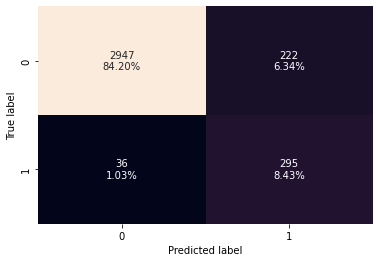

<IPython.core.display.Javascript object>

In [116]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 5 | Threshold : 0.144 | Dataset: Training")
confusion_matrix_sklearn_with_threshold(
    lg1, X_train, y_train, threshold=optimal_threshold_auc_roc
)

Confusion Matrix | Model: 5 | Threshold : 0.144 | Dataset: Test


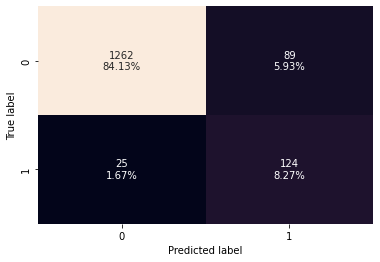

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 5 | Threshold : 0.144 | Dataset: Test")

confusion_matrix_sklearn_with_threshold(
    lg1, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [118]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification(
    lg1, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Performance Metrics | Model: 5 | Threshold : 0.144 | Dataset: Training")
log_reg_model_train_perf_threshold_auc_roc

Performance Metrics | Model: 5 | Threshold : 0.144 | Dataset: Training


Accuracy    Recall  Precision        F1
0  0.926286  0.891239     0.5706  0.695755

<IPython.core.display.Javascript object>

In [119]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification(
    lg1, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Performance Metrics | Model: 5 | Threshold : 0.144 | Dataset: Test")
log_reg_model_test_perf_threshold_auc_roc

Performance Metrics | Model: 5 | Threshold : 0.144 | Dataset: Test


Accuracy    Recall  Precision        F1
0     0.924  0.832215    0.58216  0.685083

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. The recall has improved significantly when we used the optimal threshold from the AUC-ROC curve. Recall on the training set is 89% as opposed to 65% when threshold was 0.5. Recall on test is 83% as opposed to 57% when threshold was 0.5.

What about the optimal threshold using the precision-recall curve?

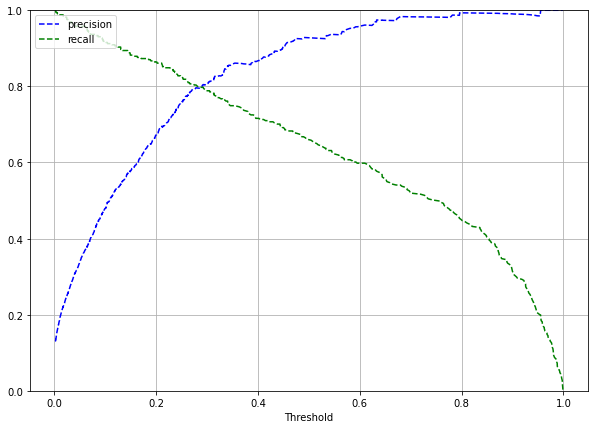

<IPython.core.display.Javascript object>

In [120]:
# let's plot the precision-recall first

y_scores = lg1.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.grid()
plt.show()

In [121]:
# eyeballing the threshold from the precision-recall curve
optimal_threshold_curve = 0.27

<IPython.core.display.Javascript object>

Confusion Matrix | Model: 6 | Threshold : 0.27 | Dataset: Training


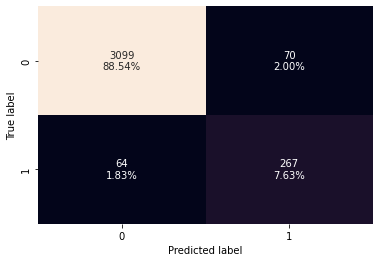

<IPython.core.display.Javascript object>

In [122]:
# creating confusion matrix for training data
print("Confusion Matrix | Model: 6 | Threshold : 0.27 | Dataset: Training")
confusion_matrix_sklearn_with_threshold(
    lg1, X_train, y_train, threshold=optimal_threshold_curve
)

Confusion Matrix | Model: 6 | Threshold : 0.27 | Dataset: Testing


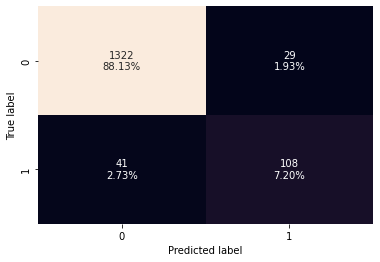

<IPython.core.display.Javascript object>

In [123]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 6 | Threshold : 0.27 | Dataset: Testing")
confusion_matrix_sklearn_with_threshold(
    lg1, X_test, y_test, threshold=optimal_threshold_curve
)

In [124]:
log_reg_model_train_prec_recall_curve = model_performance_classification(
    lg1, X_train, y_train, threshold=optimal_threshold_curve
)
print("Performance Metrics | Model: 6 | Threshold : 0.27 | Dataset: Training")
log_reg_model_train_prec_recall_curve


Performance Metrics | Model: 6 | Threshold : 0.27 | Dataset: Training


Accuracy    Recall  Precision        F1
0  0.961714  0.806647   0.792285  0.799401

<IPython.core.display.Javascript object>

In [125]:
log_reg_model_test_prec_recall_curve = model_performance_classification(
    lg1, X_test, y_test, threshold=optimal_threshold_curve
)
print("Performance Metrics | Model: 6 | Threshold : 0.27 | Dataset: Testing")
log_reg_model_test_prec_recall_curve

Performance Metrics | Model: 6 | Threshold : 0.27 | Dataset: Testing


Accuracy    Recall  Precision        F1
0  0.953333  0.724832   0.788321  0.755245

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. Optimal Threshold was obtained from the Recall-Precision curve as 0.27.
2. With this threshold, recall on the training dataset is 80% and 73% on the test set. This model is also overfitting and indicates that it could not generalize its learnings.

#### Model #7: Sequential Feature Selection

Let us try Sequential Feature Selection to see if the scores can be improved any further.

In [126]:
# verifying the current number of columns in the X dataset
X_train.shape

(3500, 32)

<IPython.core.display.Javascript object>

There are 32 columns in the dataset now. 

In [127]:
# n_job = -1 to use all cores of CPUs
# max_iter=100 means the maximum number of iterations taken for the solvers to converge.
sfs_model = LogisticRegression(
    solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100
)

<IPython.core.display.Javascript object>

In [128]:
# we will select the best subset of features using SFS modelling
# k_features = "best" enables to select the best subset of features

sfs = SFS(
    sfs_model,
    k_features="best",
    forward=True,
    floating=False,
    scoring="recall",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# fitting the model on the training datasets
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    6.6s finished

[2023-01-19 12:00:27] Features: 1/32 -- score: 0.2690185436454093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.0s finished

[2023-01-19 12:00:29] Features: 2/32 -- score: 0.356490275893261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2023-01-19 12:00:30] Features: 3/32 -- score: 0.40479421076435995[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.3s finished

[2023-01-19 12:00:31] Features: 4/32 -- score: 0.5467209407507915[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished

[2023-01-19 12:01:07] Features: 29/32 -- score: 0.6494798733604703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished

[2023-01-19 12:01:08] Features: 30/32 -- score: 0.649434644957033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s finished

[2023-01-19 12:01:09] Features: 31/32 -- score: 0.649434644957033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished

[2023-01-19 12:01:09] Features: 32/32 -- score: 0.6465400271370421

<IPython.core.display.Javascript object>

In [129]:
# the column numbers of the chosen best features
sfs.k_feature_idx_

(0, 1, 2, 4, 5, 6, 7, 8, 9, 13, 20, 27, 30, 31)

<IPython.core.display.Javascript object>

In [130]:
# names of the columns that were selected
X_train.columns[list(sfs.k_feature_idx_)]

Index(['Age', 'Income', 'CCAvg', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'Education_2', 'Education_3', 'region_Central Coast',
       'region_Northern California', 'region_South Coast', 'Family_3',
       'Family_4'],
      dtype='object')

<IPython.core.display.Javascript object>

In [131]:
# we can use the feature selection model to transform the training and test data sets
X_train_sele = sfs.transform(X_train)
X_test_sele = sfs.transform(X_test)

<IPython.core.display.Javascript object>

In [132]:
# building the new logisitic regression model
lg_sfs = LogisticRegression(solver="newton-cg", random_state=1,)

<IPython.core.display.Javascript object>

In [133]:
# fitting the data
lg4 = lg_sfs.fit(X_train_sele, y_train)

<IPython.core.display.Javascript object>

Confusion Matrix | Model: 7 | Threshold : 0.27 | Dataset: training


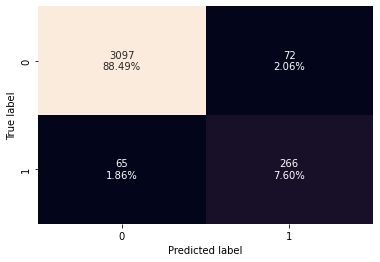

<IPython.core.display.Javascript object>

In [134]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 7 | Threshold : 0.27 | Dataset: training")
confusion_matrix_sklearn_with_threshold(lg4, X_train_sele, y_train, threshold=0.27)

Confusion Matrix | Model: 7 | Threshold : 0.27 | Dataset: Testing


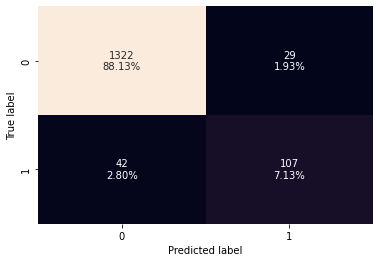

<IPython.core.display.Javascript object>

In [135]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 7 | Threshold : 0.27 | Dataset: Testing")
confusion_matrix_sklearn_with_threshold(lg4, X_test_sele, y_test, threshold=0.27)

In [136]:
# print the performance metrics of training data
print("Performance Metrics | Model: 7 | Threshold : 0.27 | Dataset: Training")

logreg_sfs_feature_sel_train = model_performance_classification(
    lg4, X_train_sele, y_train, threshold=0.27
)
logreg_sfs_feature_sel_train

Performance Metrics | Model: 7 | Threshold : 0.27 | Dataset: Training


Accuracy    Recall  Precision        F1
0  0.960857  0.803625   0.786982  0.795217

<IPython.core.display.Javascript object>

In [137]:
# print the performance metrics of testing data
print("Performance Metrics | Model: 7 | Threshold : 0.27 | Dataset: Testing")
logreg_sfs_feature_sel_test = model_performance_classification(
    lg4, X_test_sele, y_test, threshold=0.27
)
logreg_sfs_feature_sel_test

Performance Metrics | Model: 7 | Threshold : 0.27 | Dataset: Testing


Accuracy    Recall  Precision        F1
0  0.952667  0.718121   0.786765  0.750877

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
Feature selection has not improved our scores any more than the previous model.

### Summary of Logistic Regression

We have built 7 models for logistic regression. In the following section, we will concatenate the scores from each model into a single dataframe for ease of comparison. Training and test data scores will be provided one after the other, and the indices will indicate the model name. 

In [138]:
# we will concatentate the individual scores dataframes into a single dataframe

# declaring the scores dataframes into a variable
lg_ind_perf_tables = [
    LogModelTrain,
    LogModelTest,
    LogModelLowThresTrain,
    LogModelLowThresTest,
    LogModelBalancedTrain,
    LogModelBalancedTest,
    LogModelInverseBalTrain,
    LogModelInverseBalTest,
    log_reg_model_train_perf_threshold_auc_roc,
    log_reg_model_test_perf_threshold_auc_roc,
    log_reg_model_train_prec_recall_curve,
    log_reg_model_test_prec_recall_curve,
    logreg_sfs_feature_sel_train,
    logreg_sfs_feature_sel_test,
]

# concatenating to the new df
# renaming the index to indicate the model and dataset
logisticregression_perf_comp_df = pd.concat(
    lg_ind_perf_tables, ignore_index=True
).rename(
    index={
        0: "Default Model (thres=0.5)_Train",
        1: "Default Model (thres=0.5)_Test",
        2: "Low Threshold(thres=0.2)_Train",
        3: "Low Threshold(thres=0.2)_Test",
        4: "Class Weights Balanced(thres=0.2)_Train",
        5: "Class Weights Balanced(thres=0.2)_Test",
        6: "Inverse Balance(thres=0.2)_Train",
        7: "Inverse Balance(thres=0.2)_Test",
        8: "Optimal AUC-ROC(thres=0.144)_Train",
        9: "Optimal AUC-ROC(thres=0.144)_Test",
        10: "Optimal Precision-Recall (thres=0.27)_Train",
        11: "Optimal Precision-Recall (thres=0.27)_Test",
        12: "Feature Selection(thres=0.27)_Train",
        13: "Feature Selection(thres=0.27)_Test",
    }
)
logisticregression_perf_comp_df

Accuracy    Recall  Precision  \
Default Model (thres=0.5)_Train              0.962857  0.658610   0.927660   
Default Model (thres=0.5)_Test               0.952667  0.577181   0.914894   
Low Threshold(thres=0.2)_Train               0.947429  0.864048   0.672941   
Low Threshold(thres=0.2)_Test                0.944667  0.798658   0.691860   
Class Weights Balanced(thres=0.2)_Train      0.785429  0.981873   0.303738   
Class Weights Balanced(thres=0.2)_Test       0.794667  0.966443   0.322148   
Inverse Balance(thres=0.2)_Train             0.724857  0.984894   0.253894   
Inverse Balance(thres=0.2)_Test              0.729333  0.966443   0.264220   
Optimal AUC-ROC(thres=0.144)_Train           0.926286  0.891239   0.570600   
Optimal AUC-ROC(thres=0.144)_Test            0.924000  0.832215   0.582160   
Optimal Precision-Recall (thres=0.27)_Train  0.961714  0.806647   0.792285   
Optimal Precision-Recall (thres=0.27)_Test   0.953333  0.724832   0.788321   
Feature Selection(thres=0.27)_Train          0.960857  0.803625   0.786982   
Feature Selection(thres=0.27)_Test           0.952667  0.718121   0.786765   

                                                   F1  
Default Model (thres=0.5)_Train              0.770318  
Default Model (thres=0.5)_Test               0.707819  
Low Threshold(thres=0.2)_Train               0.756614  
Low Threshold(thres=0.2)_Test                0.741433  
Class Weights Balanced(thres=0.2)_Train      0.463954  
Class Weights Balanced(thres=0.2)_Test       0.483221  
Inverse Balance(thres=0.2)_Train             0.403715  
Inverse Balance(thres=0.2)_Test              0.414986  
Optimal AUC-ROC(thres=0.144)_Train           0.695755  
Optimal AUC-ROC(thres=0.144)_Test            0.685083  
Optimal Precision-Recall (thres=0.27)_Train  0.799401  
Optimal Precision-Recall (thres=0.27)_Test   0.755245  
Feature Selection(thres=0.27)_Train          0.795217  
Feature Selection(thres=0.27)_Test           0.750877

<IPython.core.display.Javascript object>

As you can see, the model using the threshold of 0.2 gave excellent recall scores on training(98%) and test data (97%), when the class weights were adjusted (Models: Class Weights Balanced(thres=0.2)and Inverse Balance(thres=0.2)).
This means that both model are generalized and will predict well on new data. Since recalls are almost equal, let's take any one of these models as the final logistic regression model. 

Let's consider <b>Inverse Balance(thres=0.2)</b> as the final model and derive the coefficients of this model.

In [139]:
log_odds = lg3.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T.sort_values(
    by="coef", axis=1, ascending=False
)

Income     CCAvg  CD_Account  Education_3  Education_2  Family_3  \
coef  6.318002  2.443826    2.324355     1.732793     1.614125  1.118053   

      Family_4  region_Central Valley  Mortgage  region_South Coast  \
coef  0.768145               0.330314  0.276525            0.162537   

      region_California Central Coast  region_Northern California  \
coef                          0.14711                    0.119793   

      region_Southern California  Family_2       Age  \
coef                    0.009285     0.006  0.001525   

      region_San Francisco Bay  region_San Martín  region_Imperial Valley  \
coef                 -0.002553          -0.004934               -0.010518   

      region_North Bay  region_Greater Los Angeles California Central Coast  \
coef         -0.027284                                           -0.02802     

      region_Sierra Nevada  region_North Coast  region_San Joaquin Valley  \
coef             -0.032523           -0.080384                  -0.092756   

      region_East Bay  region_California North Coast  region_Central Coast  \
coef        -0.107915                      -0.108864             -0.134859   

      region_California Central Valley  region_Northern Pacific Coast  \
coef                         -0.156395                      -0.173205   

      region_Sacramento Valley    Online  CreditCard  Securities_Account  
coef                 -0.287072 -0.365584   -0.613377            -0.73801

<IPython.core.display.Javascript object>

In [140]:
# converting coefficients to odds
odds = np.exp(lg3.coef_[0])

# calculating probability from odds
probability = odds / (1 + odds)

# finding the percentage change
perc_change_odds = (np.exp(lg3.coef_[0]) - 1) * 100


# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds, probability and percentage change in odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Probability": probability, "Change_odd%": perc_change_odds},
    index=X_train.columns,
).T.sort_values(by="Odds", axis=1, ascending=False)

Income        CCAvg  CD_Account  Education_3  Education_2  \
Odds           554.464007    11.517024   10.220090     5.656429     5.023489   
Probability      0.998200     0.920109    0.910874     0.849769     0.833983   
Change_odd%  55346.400670  1051.702373  922.008981   465.642932   402.348891   

               Family_3    Family_4  region_Central Valley   Mortgage  \
Odds           3.058891    2.155764               1.391405   1.318540   
Probability    0.753627    0.683119               0.581836   0.568694   
Change_odd%  205.889131  115.576359              39.140472  31.854041   

             region_South Coast  region_California Central Coast  \
Odds                   1.176492                         1.158481   
Probability            0.540545                         0.536711   
Change_odd%           17.649195                        15.848082   

             region_Northern California  region_Southern California  Family_2  \
Odds                           1.127263                    1.009328  1.006018   
Probability                    0.529912                    0.502321  0.501500   
Change_odd%                   12.726349                    0.932821  0.601773   

                  Age  region_San Francisco Bay  region_San Martín  \
Odds         1.001526                  0.997450           0.995078   
Probability  0.500381                  0.499362           0.498766   
Change_odd%  0.152576                 -0.254993          -0.492203   

             region_Imperial Valley  region_North Bay  \
Odds                       0.989538          0.973084   
Probability                0.497371          0.493179   
Change_odd%               -1.046243         -2.691558   

             region_Greater Los Angeles California Central Coast  \
Odds                                                  0.972369     
Probability                                           0.492995     
Change_odd%                                          -2.763097     

             region_Sierra Nevada  region_North Coast  \
Odds                     0.968001            0.922762   
Probability              0.491870            0.479915   
Change_odd%             -3.199934           -7.723835   

             region_San Joaquin Valley  region_East Bay  \
Odds                          0.911416         0.897704   
Probability                   0.476828         0.473047   
Change_odd%                  -8.858406       -10.229645   

             region_California North Coast  region_Central Coast  \
Odds                              0.896852              0.873839   
Probability                       0.472811              0.466336   
Change_odd%                     -10.314775            -12.616055   

             region_California Central Valley  region_Northern Pacific Coast  \
Odds                                 0.855221                       0.840965   
Probability                          0.460981                       0.456807   
Change_odd%                        -14.477903                     -15.903496   

             region_Sacramento Valley     Online  CreditCard  \
Odds                         0.750458   0.693792    0.541519   
Probability                  0.428721   0.409609    0.351289   
Change_odd%                -24.954202 -30.620842  -45.848067   

             Securities_Account  
Odds                   0.478064  
Probability            0.323439  
Change_odd%          -52.193586

<IPython.core.display.Javascript object>

### Coefficient Interpretations
- Income, Education, CD_Account, CCAvg and Family have positive coefficients and are some of the most important features.
- Income: Holding all other features constant, a 1 unit change in Income will increase the odds of a person purchasing a loan by 555 times or a 99% chance increase. 
- CCAvg: Holding all other features constant, a 1 unit change in average spending on CC will increase the odds of a person purchasing a loan by 11.5 times or a 92% chance increase.
- CD_Account: Having a CD Account will increase the chance of purchasing a loan by 94%, or if all other features are held constant, a 1 unit increase in CD Account will increase the odds of purchase by 10.22 times.
- Securities Account: Holding all other features constant, a 1 unit change in Securities Account will result in 52% decrease in odds of purchasing a loan. 
- Credit Card: Holding all other features constant, a 1 unit change in Credit Card will result in 45% decrease in odds of purchasing a loan. 

## Decision Tree

Let us try building a decision tree model next. 

#### Model #1: Default Decision Tree

We can build a decision tree with default parameters like criterion = gini. 

In [141]:
dTree1 = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

Confusion Matrix | Model: 1 | Dataset: training


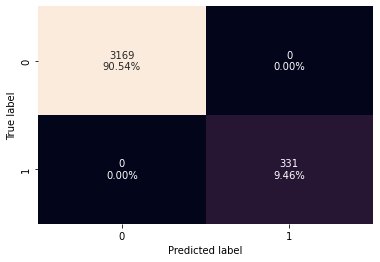

<IPython.core.display.Javascript object>

In [142]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 1 | Dataset: training")
confusion_matrix_sklearn_with_threshold(dTree1, X_train, y_train)

Confusion Matrix | Model: 1 | Dataset: testing


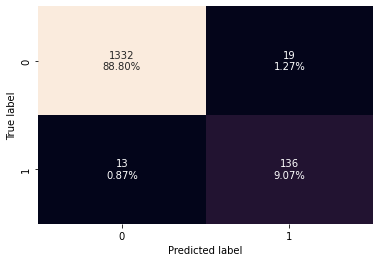

<IPython.core.display.Javascript object>

In [143]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 1 | Dataset: testing")
confusion_matrix_sklearn_with_threshold(dTree1, X_test, y_test)

Let's print the scores of this decision tree

In [144]:
print("Performance Metrics | Model: 1 | Dataset: training")
decision_tree_perf_train = model_performance_classification(dTree1, X_train, y_train)
decision_tree_perf_train

Performance Metrics | Model: 1 | Dataset: training


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [145]:
print("Performance Metrics | Model: 1 | Dataset: test")
decision_tree_perf_test = model_performance_classification(dTree1, X_test, y_test)
decision_tree_perf_test

Performance Metrics | Model: 1 | Dataset: test


Accuracy    Recall  Precision        F1
0  0.978667  0.912752   0.877419  0.894737

<IPython.core.display.Javascript object>

Let's visualise the decision tree

In [146]:
# print the feature names in the decision tree
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'region_California Central Coast', 'region_California Central Valley', 'region_California North Coast', 'region_Central Coast', 'region_Central Valley', 'region_East Bay', 'region_Greater Los Angeles California Central Coast', 'region_Imperial Valley', 'region_North Bay', 'region_North Coast', 'region_Northern California', 'region_Northern Pacific Coast', 'region_Sacramento Valley', 'region_San Francisco Bay', 'region_San Joaquin Valley', 'region_San Martín', 'region_Sierra Nevada', 'region_South Coast', 'region_Southern California', 'Family_2', 'Family_3', 'Family_4']


<IPython.core.display.Javascript object>

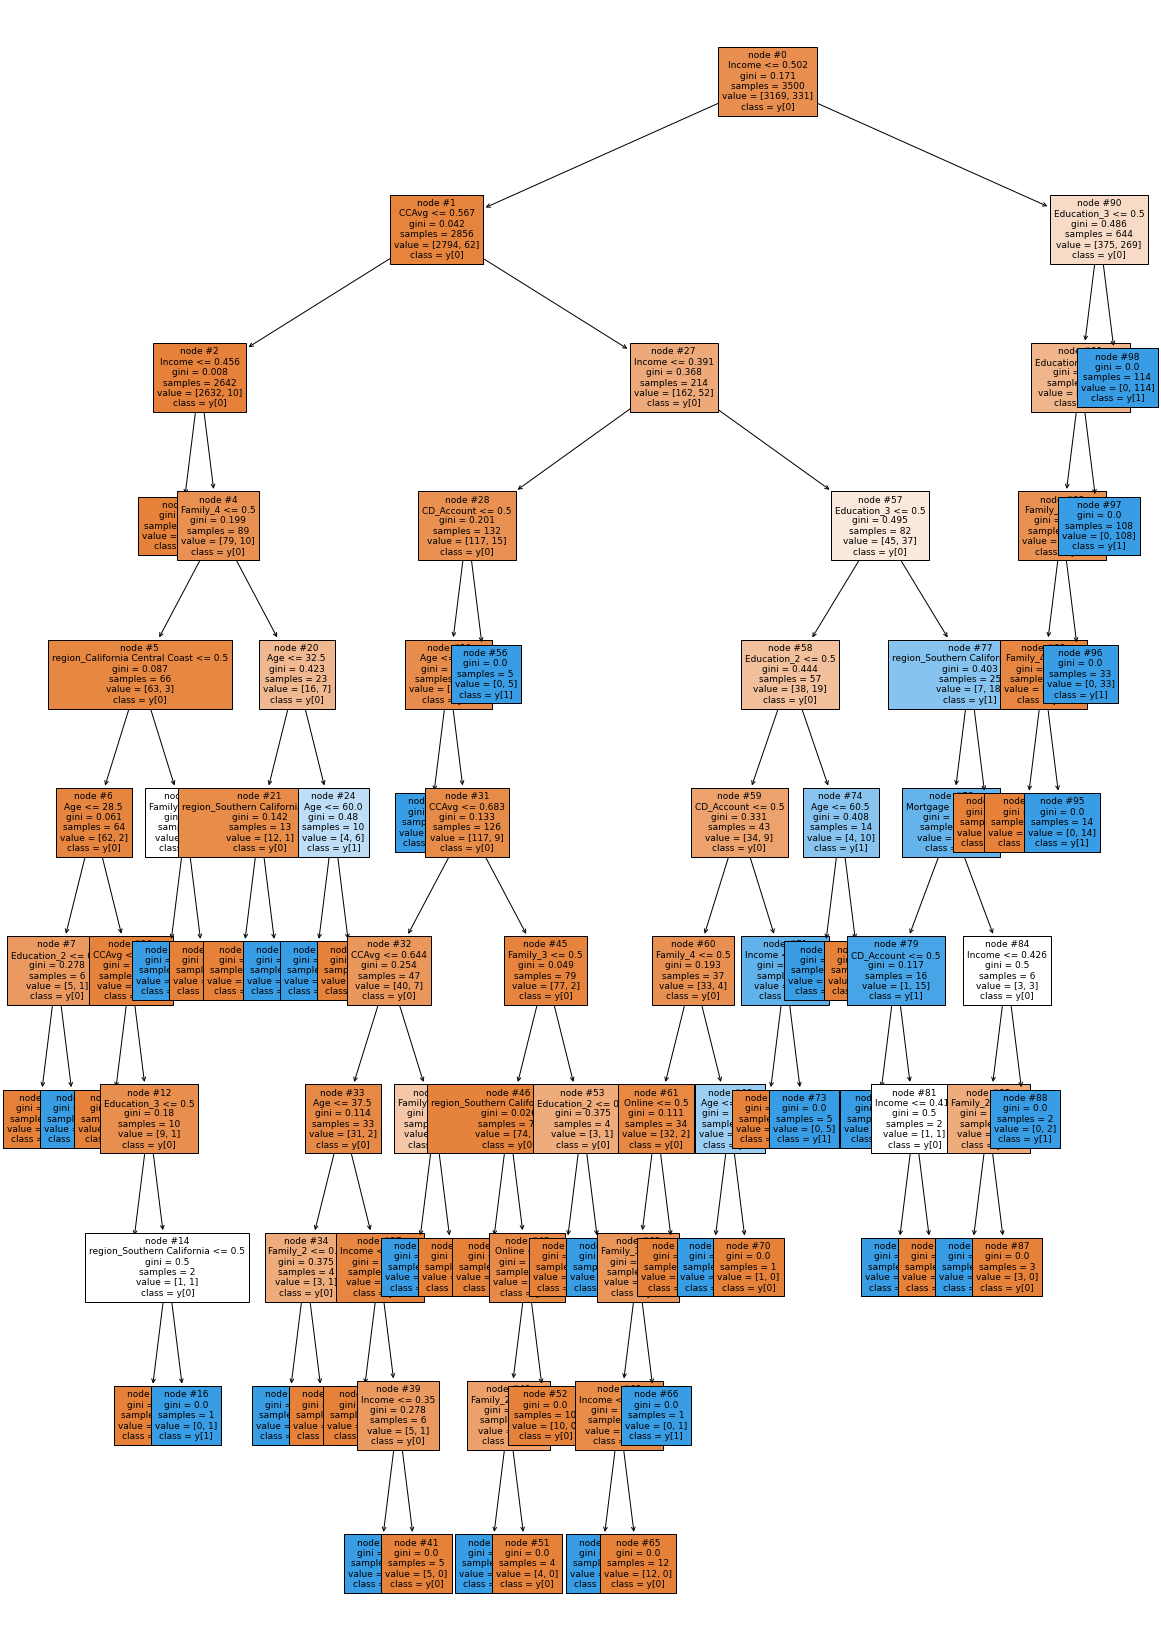

<IPython.core.display.Javascript object>

In [147]:
# printing the decision tree in a graphical format using plot_tree from sklearn

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [148]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- Income <= 0.50
|   |--- CCAvg <= 0.57
|   |   |--- Income <= 0.46
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  0.46
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- region_California Central Coast <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 0.42
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  0.42
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- region_Southern California <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00,

<IPython.core.display.Javascript object>

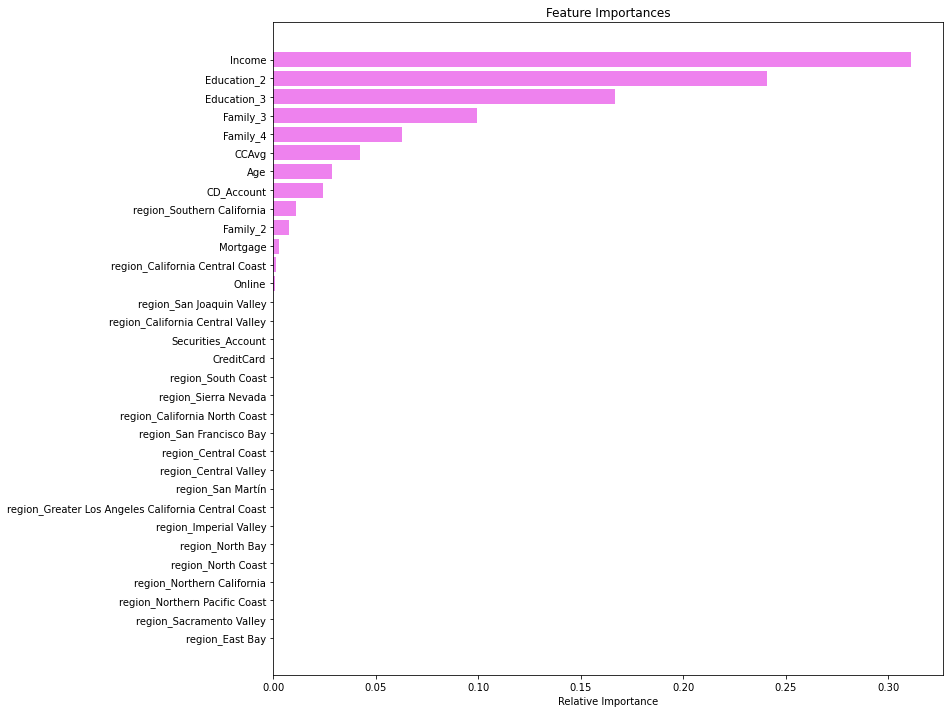

<IPython.core.display.Javascript object>

In [149]:
# importance of features in the tree building in graphical format

importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [150]:
# importance of features in the tree building in numerical format

print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                         Imp
Income                                              0.311069
Education_2                                         0.240847
Education_3                                         0.166724
Family_3                                            0.099344
Family_4                                            0.062971
CCAvg                                               0.042459
Age                                                 0.028730
CD_Account                                          0.024144
region_Southern California                          0.010823
Family_2                                            0.007674
Mortgage                                            0.002787
region_California Central Coast                     0.001422
Online                                              0.001006
CreditCard                                          0.000000
region_Northern Pacific Coast                       0.000000
region_South Coast      

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. The default tree is a very complex tree and starts branching out at Income less than or equal to 0.5.
2. The important features in this tree are Income, Education and Family.
3. Recall scores are 91% on test as opposed to 100% on training. This indicates a high level of over fitting. 

We will try to improve this tree.

#### Model #2: Balancing class weights

Since we know that classes are imbalanced in the dataset, we can train our model to be balanced by using the class_weight = "balanced" parameter

In [151]:
dTree2 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dTree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

Let's print the confusion matrix and the score matrix

Confusion Matrix | Model: 2 | Dataset: train


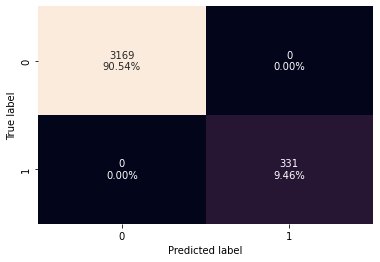

<IPython.core.display.Javascript object>

In [152]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 2 | Dataset: train")
confusion_matrix_sklearn_with_threshold(dTree2, X_train, y_train)

Confusion Matrix | Model: 2 | Dataset: testing


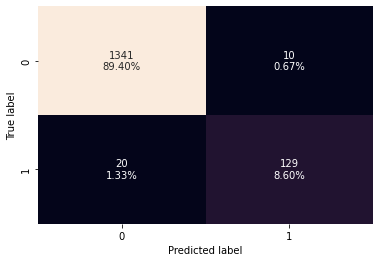

<IPython.core.display.Javascript object>

In [153]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 2 | Dataset: testing")
confusion_matrix_sklearn_with_threshold(dTree2, X_test, y_test)

In [154]:
print("Performance Metrics | Model: 2 | Dataset: train")
decision_tree_cw_train = model_performance_classification(dTree2, X_train, y_train)
decision_tree_cw_train

Performance Metrics | Model: 2 | Dataset: train


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [155]:
print("Performance Metrics | Model: 2 | Dataset: test")
decision_tree_cw_test = model_performance_classification(dTree2, X_test, y_test)
decision_tree_cw_test

Performance Metrics | Model: 2 | Dataset: test


Accuracy    Recall  Precision        F1
0      0.98  0.865772   0.928058  0.895833

<IPython.core.display.Javascript object>

Let's visualize the new tree

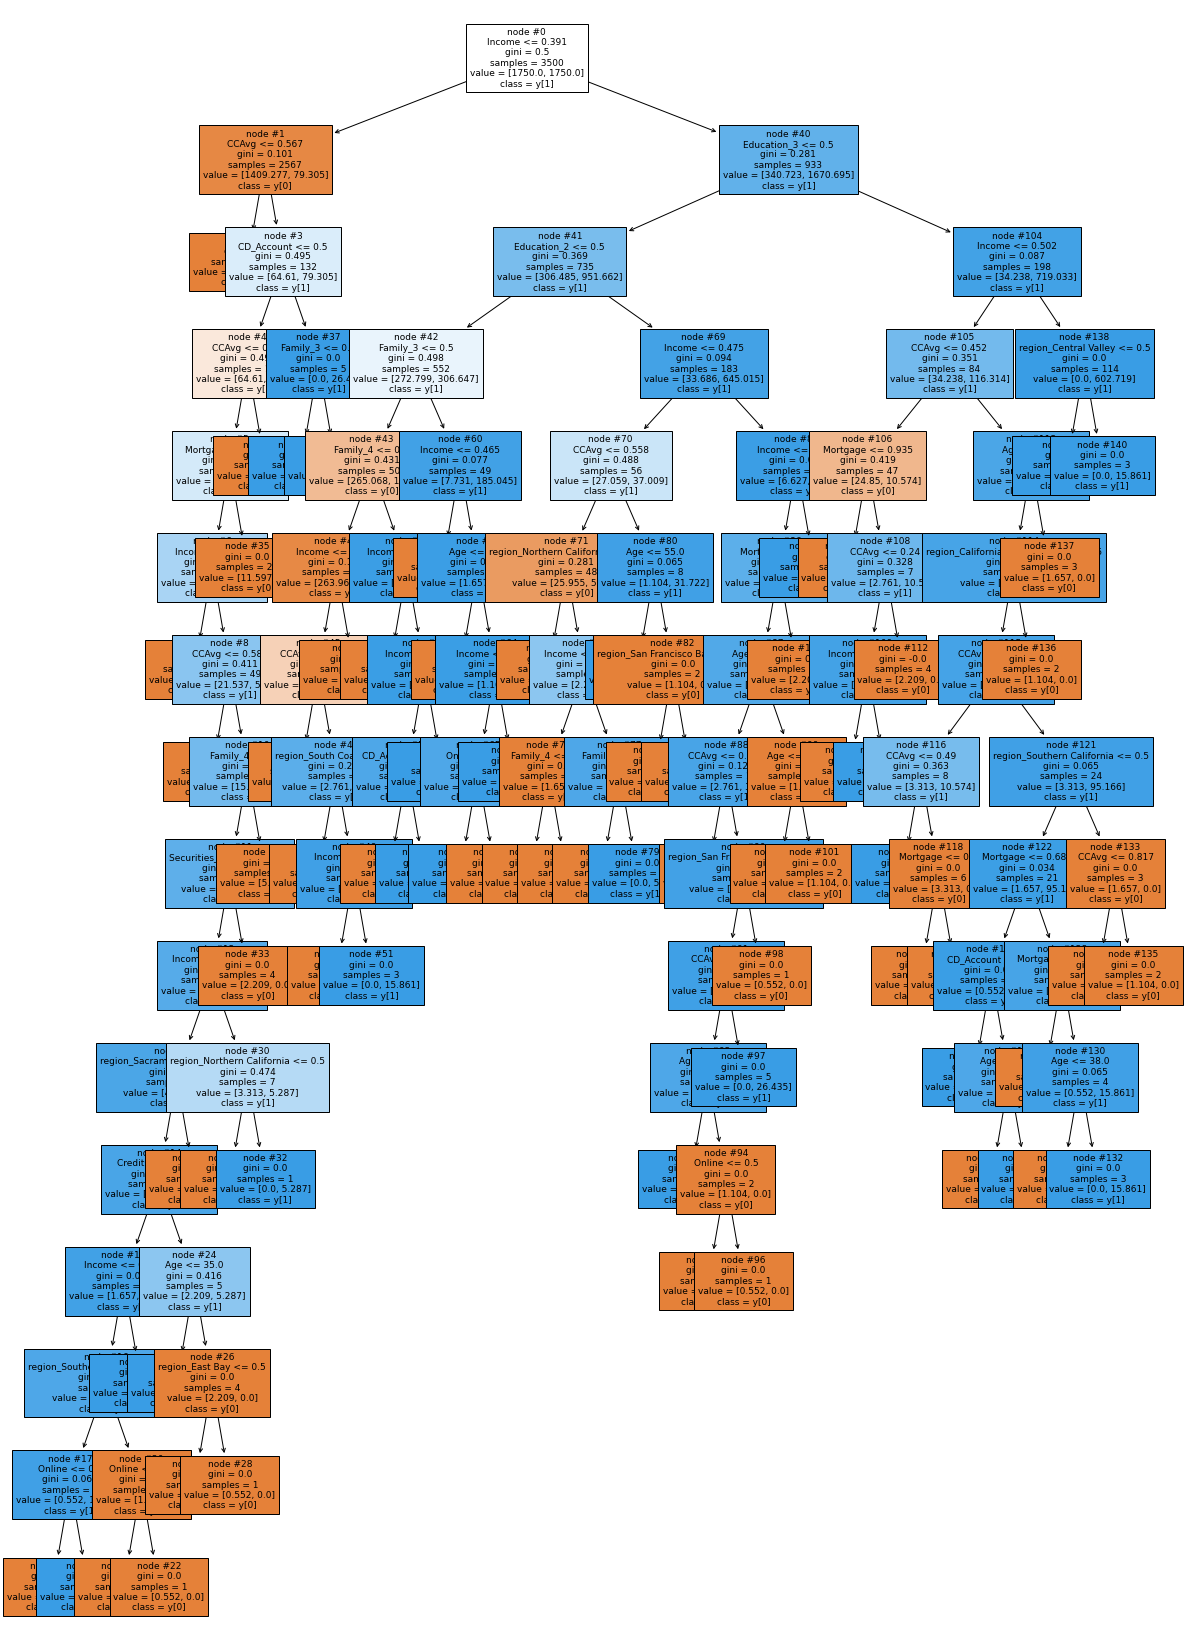

<IPython.core.display.Javascript object>

In [156]:
# printing the decision tree in a graphical format using plot_tree from sklearn

plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [157]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree2, feature_names=feature_names, show_weights=True))

|--- Income <= 0.39
|   |--- CCAvg <= 0.57
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  0.57
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 0.76
|   |   |   |   |--- Mortgage <= 0.41
|   |   |   |   |   |--- Income <= 0.28
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  0.28
|   |   |   |   |   |   |--- CCAvg <= 0.59
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  0.59
|   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 0.35
|   |   |   |   |   |   |   |   |   |   |--- region_Sacramento Valley <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- region_Sacramento Valley >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |

<IPython.core.display.Javascript object>

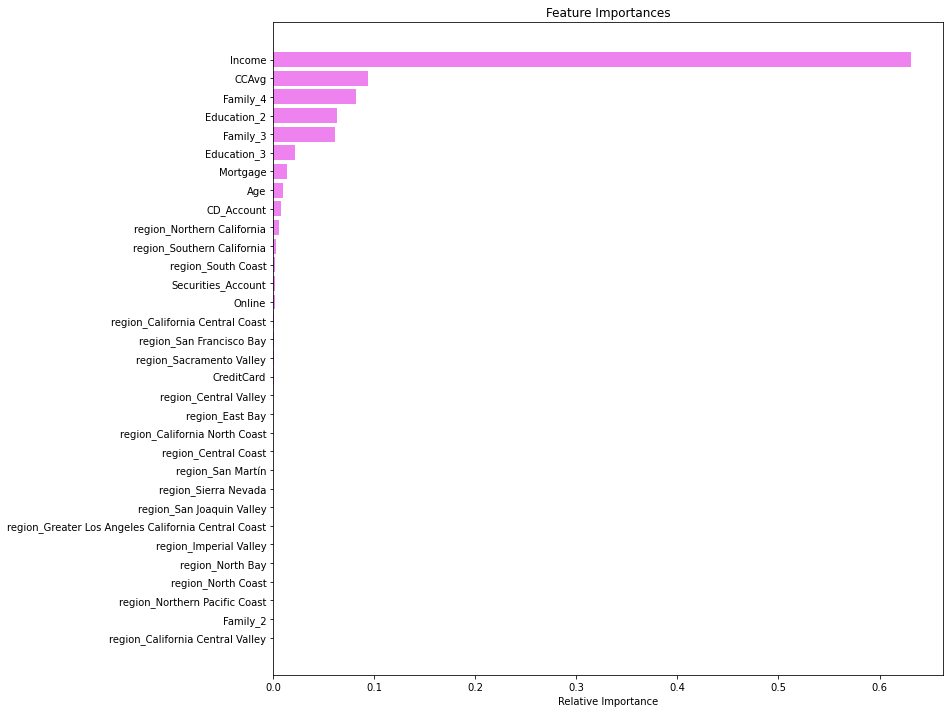

<IPython.core.display.Javascript object>

In [158]:
# importance of features in the tree building in graphical format

importances = dTree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [159]:
# importance of features in the tree building in numerical format

print(
    pd.DataFrame(
        dTree2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                             Imp
Income                                              6.311959e-01
CCAvg                                               9.409855e-02
Family_4                                            8.160120e-02
Education_2                                         6.336466e-02
Family_3                                            6.124162e-02
Education_3                                         2.114224e-02
Mortgage                                            1.326387e-02
Age                                                 9.140753e-03
CD_Account                                          8.086129e-03
region_Northern California                          5.567048e-03
region_Southern California                          2.902740e-03
region_South Coast                                  2.077810e-03
Securities_Account                                  1.853859e-03
Online                                              1.752737e-03
region_California Central

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. We can see that this tree is extremely complex. 
2. Income, CCAvg, Family and Education remain the most important features.
3. Recall scores are not also good (1 on training and 0.86 on test) and indicate overfitting of data. 

We will need to improve this model. 

#### Model #3: GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more by using GridSearchCV to perform hyperparameter tuning. 


In [160]:
# we will tune the model with a maximum depth ranging from 2 to 50 (in steps of 5) and also with unlimited depth

# Choose the type of classifier.
dTree3 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [5, 10, 15, 20, 25, 30],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree3, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dTree3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

The best combination of parameters are:
- criterion='entropy' 
- max_leaf_nodes=25
- min_impurity_decrease=0.001 and
- random_state=1

Confusion Matrix | Model: 3 | Dataset: training


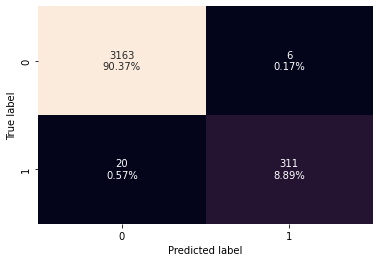

<IPython.core.display.Javascript object>

In [161]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 3 | Dataset: training")
confusion_matrix_sklearn_with_threshold(dTree3, X_train, y_train)

Confusion Matrix | Model: 3 | Dataset: testing


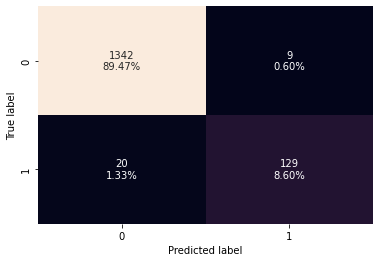

<IPython.core.display.Javascript object>

In [162]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 3 | Dataset: testing")
confusion_matrix_sklearn_with_threshold(dTree3, X_test, y_test)

In [163]:
print("Performance Metrics | Model: 3 | Dataset: train")
decision_tree_tune_perf_train = model_performance_classification(
    dTree3, X_train, y_train
)
decision_tree_tune_perf_train

Performance Metrics | Model: 3 | Dataset: train


Accuracy    Recall  Precision        F1
0  0.992571  0.939577   0.981073  0.959877

<IPython.core.display.Javascript object>

In [164]:
print("Performance Metrics | Model: 3 | Dataset: test")
decision_tree_tune_perf_test = model_performance_classification(dTree3, X_test, y_test)
decision_tree_tune_perf_test

Performance Metrics | Model: 3 | Dataset: test


Accuracy    Recall  Precision        F1
0  0.980667  0.865772   0.934783  0.898955

<IPython.core.display.Javascript object>

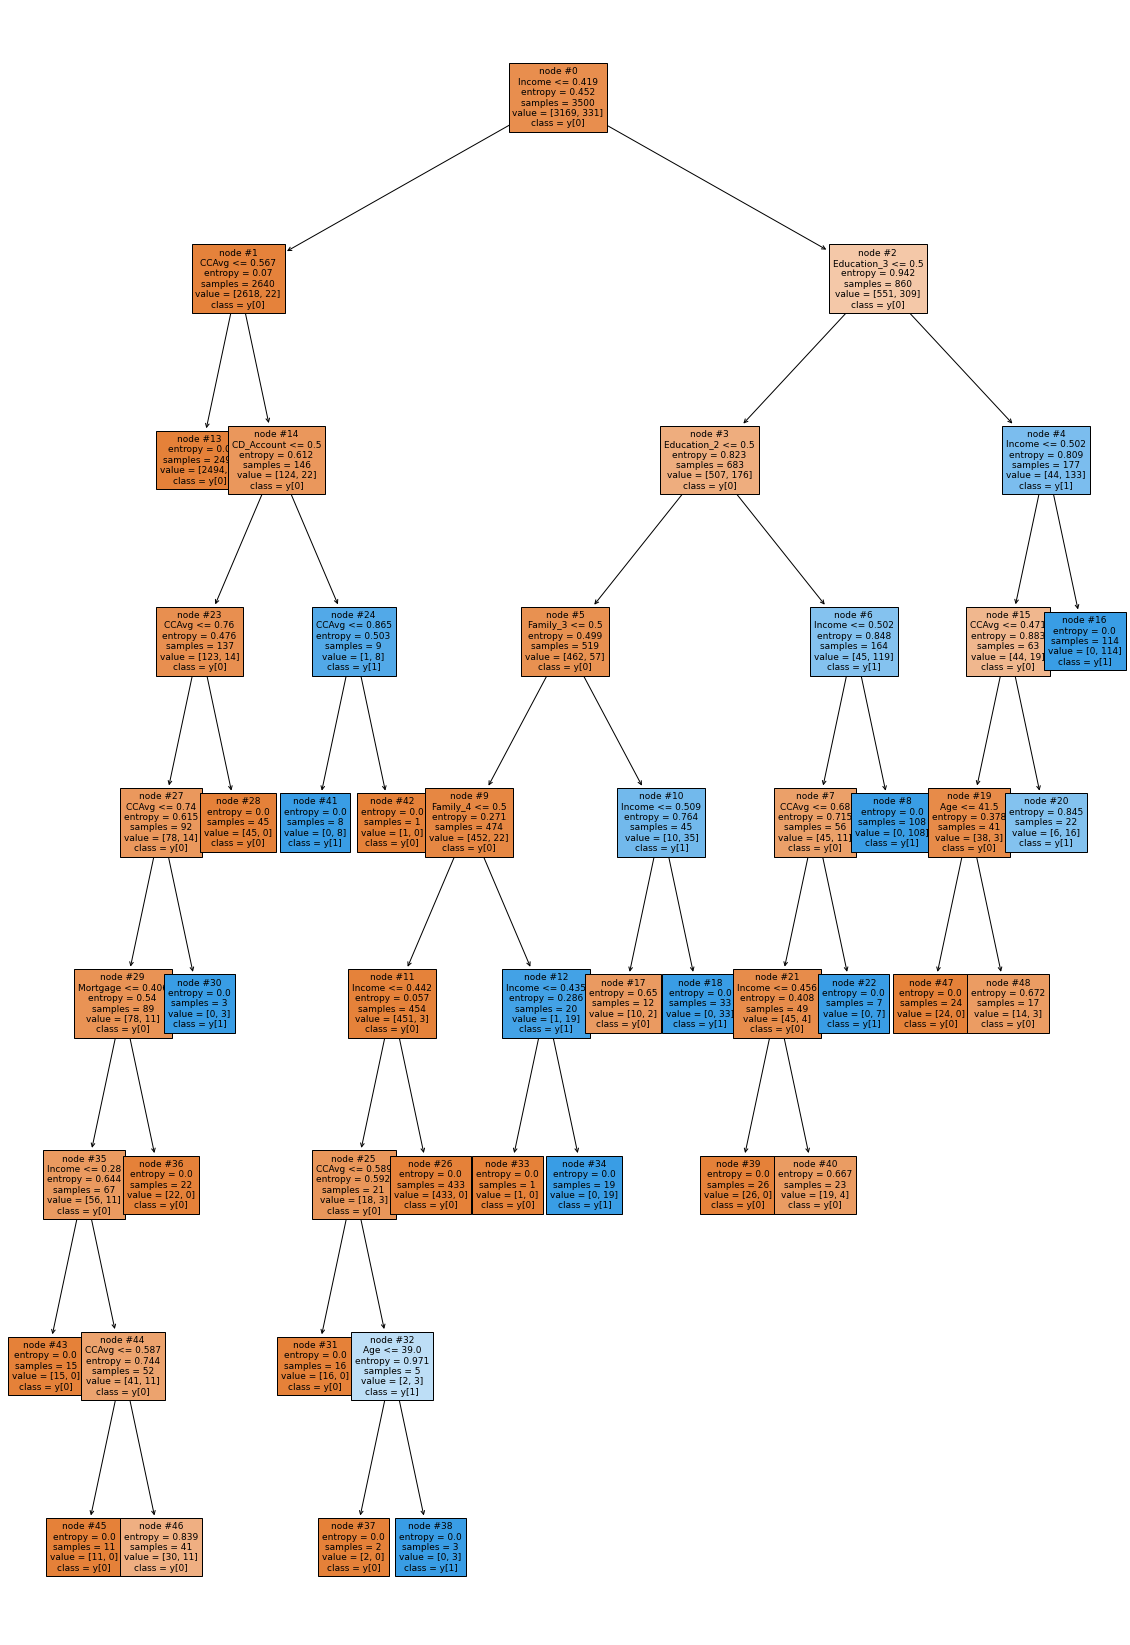

<IPython.core.display.Javascript object>

In [165]:
plt.figure(figsize=(20, 30))

tree.plot_tree(
    dTree3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [166]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree3, feature_names=feature_names, show_weights=True))

|--- Income <= 0.42
|   |--- CCAvg <= 0.57
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  0.57
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 0.76
|   |   |   |   |--- CCAvg <= 0.74
|   |   |   |   |   |--- Mortgage <= 0.41
|   |   |   |   |   |   |--- Income <= 0.28
|   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  0.28
|   |   |   |   |   |   |   |--- CCAvg <= 0.59
|   |   |   |   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  0.59
|   |   |   |   |   |   |   |   |--- weights: [30.00, 11.00] class: 0
|   |   |   |   |   |--- Mortgage >  0.41
|   |   |   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  0.74
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |--- CCAvg >  0.76
|   |   |   |   |--- weights: [45.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 0.87
|   |   |   |   |---

<IPython.core.display.Javascript object>

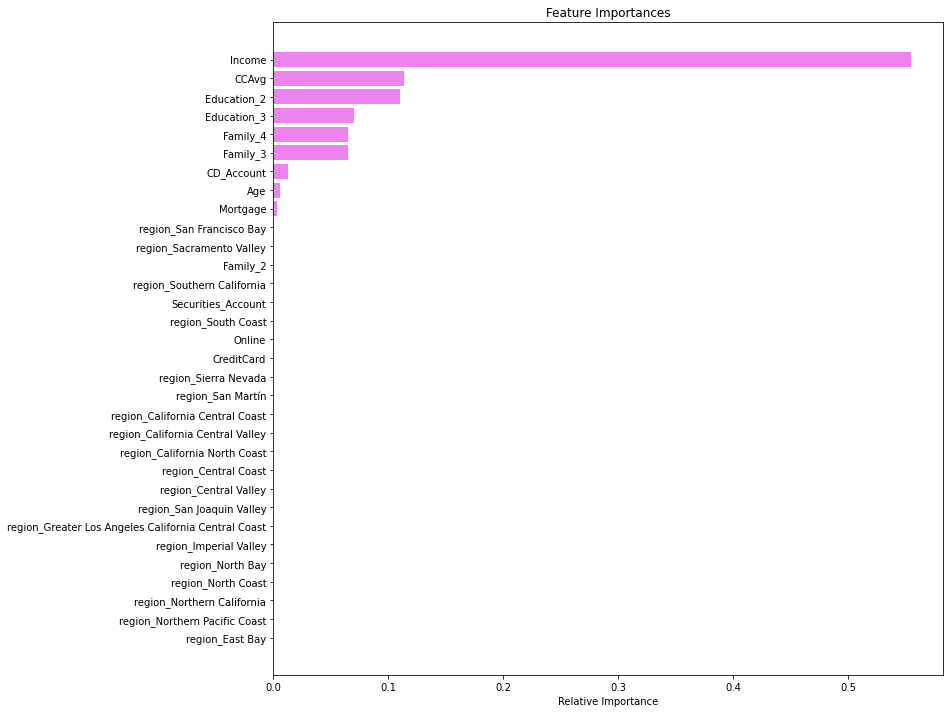

<IPython.core.display.Javascript object>

In [167]:
# importance of features in the tree building in graphical format

importances = dTree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [168]:
# importance of features in the tree building in numerical format

print(
    pd.DataFrame(
        dTree3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                         Imp
Income                                              0.554802
CCAvg                                               0.113510
Education_2                                         0.109899
Education_3                                         0.070161
Family_4                                            0.064755
Family_3                                            0.064547
CD_Account                                          0.013102
Age                                                 0.005968
Mortgage                                            0.003257
CreditCard                                          0.000000
Online                                              0.000000
Family_2                                            0.000000
region_Southern California                          0.000000
region_South Coast                                  0.000000
region_Sierra Nevada                                0.000000
region_San Martín       

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>

1. With a depth =8, the pre-pruned tree is also complex and starts branching out at Income less than or equal to 0.419. 
2. The important features are Income, CCAvg, Education and Family. 
3. Recall scores are also not good on this with 94% on training set and 86% on test set. 

#### Decision Tree #4: Improvising the pre-pruned tree

Let's improvise on the previous tree by performing some arbitrary hyperparameter tuning. We will use the best parameters suggested by GridSearchCV (criterion='entropy', min_impurity_decrease=0.001, random_state=1) and adjust other parameters as well. 
- max_leaf_nodes=10,
- max_depth=8 (depth of the previous tree was 8)
- class_weight={0: 0.09, 1: 0.91} (class weights have been inversed)

In [169]:
dTree4 = DecisionTreeClassifier(
    criterion="entropy",
    max_leaf_nodes=10,
    min_impurity_decrease=0.001,
    random_state=1,
    class_weight={0: 0.09, 1: 0.91},
    max_depth=8,
)
dTree4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.09, 1: 0.91}, criterion='entropy',
                       max_depth=8, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

Confusion Matrix | Model: 4 | Dataset: training


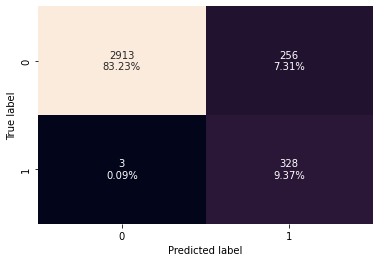

<IPython.core.display.Javascript object>

In [170]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 4 | Dataset: training")
confusion_matrix_sklearn_with_threshold(dTree4, X_train, y_train)

Confusion Matrix | Model: 4 | Dataset: test


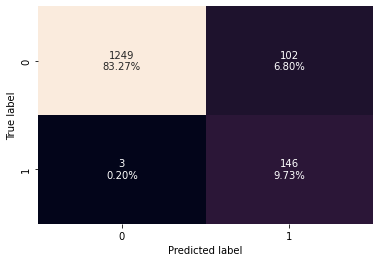

<IPython.core.display.Javascript object>

In [171]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 4 | Dataset: test")
confusion_matrix_sklearn_with_threshold(dTree4, X_test, y_test)

In [172]:
print("Performance Metrics | Model: 4 | Dataset: train")
decision_tree_preprun_train = model_performance_classification(dTree4, X_train, y_train)
decision_tree_preprun_train

Performance Metrics | Model: 4 | Dataset: train


Accuracy    Recall  Precision       F1
0     0.926  0.990937   0.561644  0.71694

<IPython.core.display.Javascript object>

In [173]:
print("Performance Metrics | Model: 4 | Dataset: test")
decision_tree_preprun_test = model_performance_classification(dTree4, X_test, y_test)
decision_tree_preprun_test

Performance Metrics | Model: 4 | Dataset: test


Accuracy    Recall  Precision        F1
0      0.93  0.979866    0.58871  0.735516

<IPython.core.display.Javascript object>

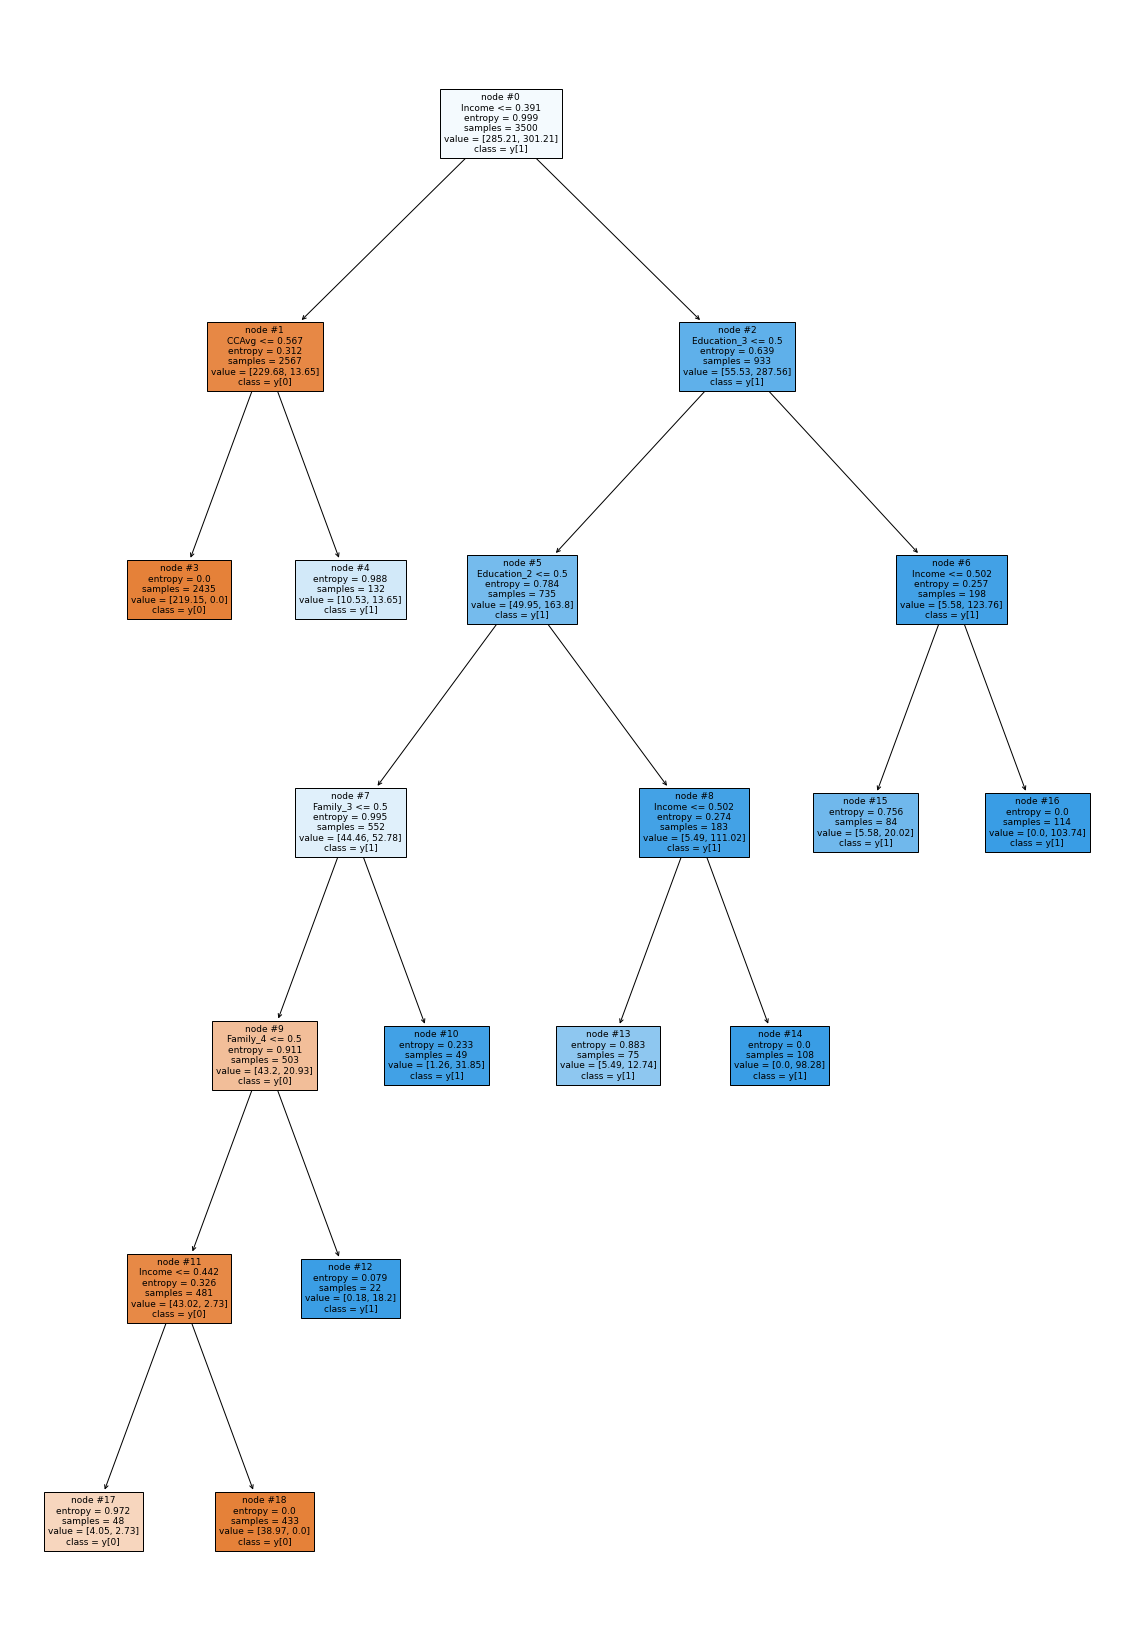

<IPython.core.display.Javascript object>

In [174]:
plt.figure(figsize=(20, 30))

tree.plot_tree(
    dTree4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [175]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree4, feature_names=feature_names, show_weights=True))

|--- Income <= 0.39
|   |--- CCAvg <= 0.57
|   |   |--- weights: [219.15, 0.00] class: 0
|   |--- CCAvg >  0.57
|   |   |--- weights: [10.53, 13.65] class: 1
|--- Income >  0.39
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 0.44
|   |   |   |   |   |   |--- weights: [4.05, 2.73] class: 0
|   |   |   |   |   |--- Income >  0.44
|   |   |   |   |   |   |--- weights: [38.97, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.18, 18.20] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.26, 31.85] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 0.50
|   |   |   |   |--- weights: [5.49, 12.74] class: 1
|   |   |   |--- Income >  0.50
|   |   |   |   |--- weights: [0.00, 98.28] class: 1
|   |--- Education_3 >  0.50
|   |   |--- Income <= 0.50
|   |   |   |--- weights: [5.58, 20.02] class

<IPython.core.display.Javascript object>

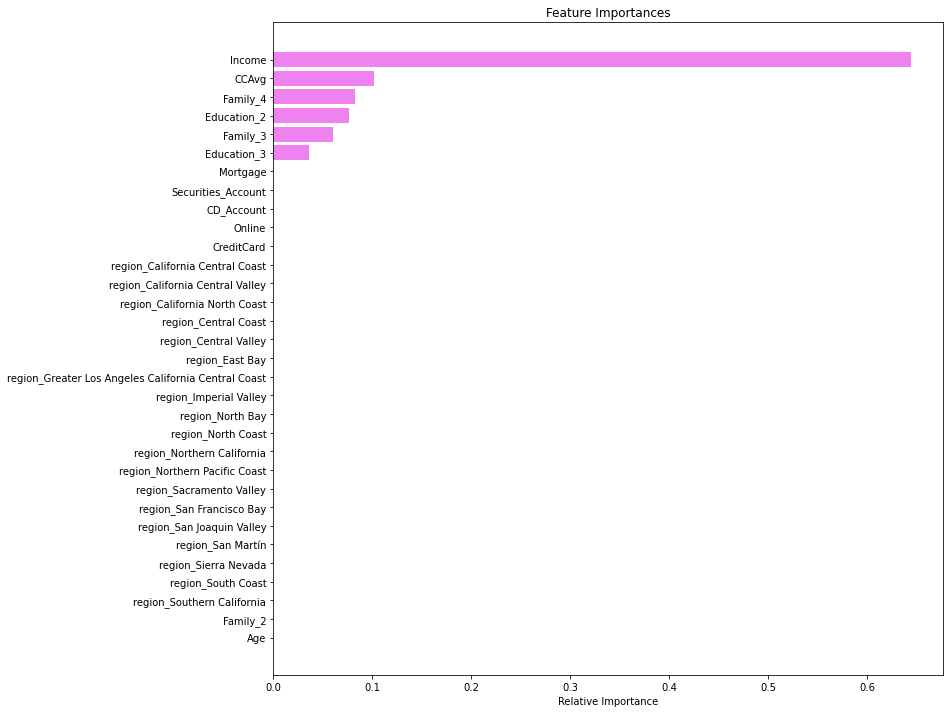

<IPython.core.display.Javascript object>

In [176]:
importances = dTree4.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [177]:
# importance of features in the tree building in numerical format

print(
    pd.DataFrame(
        dTree4.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                         Imp
Income                                              0.644023
CCAvg                                               0.101705
Family_4                                            0.082298
Education_2                                         0.076337
Family_3                                            0.059822
Education_3                                         0.035815
region_South Coast                                  0.000000
region_Sierra Nevada                                0.000000
region_Southern California                          0.000000
region_North Bay                                    0.000000
region_San Martín                                   0.000000
region_San Joaquin Valley                           0.000000
region_San Francisco Bay                            0.000000
region_Sacramento Valley                            0.000000
region_Northern Pacific Coast                       0.000000
region_Northern Californ

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. With criterion="entropy", max_leaf_nodes=10, min_impurity_decrease=0.001, random_state=1, class_weight={0: 0.09, 1: 0.91} and max_depth=8 our tree has significantly improved. It is less complex and starts branching out at Income less than or equal to 0.391. 
2. Important Features are Income, CCAvg, Family and Education. 
3. Recall scores have greatly improved. It is now 99% on training and 98% on test. This is a very good score. 

### Cost Complexity Pruning
Even though we have arrived at a good tree and great recall scores with pre-pruning, let's also perform post pruning by cost complexity pruning techniques. We will look for high values of complexity parameters, ccp_alpha, to reduce the complexity of the tree. 

#### Model #5: Post pruned model

In [178]:
dTree5 = DecisionTreeClassifier(random_state=1)
path = dTree5.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [179]:
# displaying the ccp_alphas and impurities in a dataframe
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000187    0.000562
2     0.000188    0.001125
3     0.000268    0.001661
4     0.000268    0.002735
5     0.000269    0.003809
6     0.000275    0.004360
7     0.000359    0.005435
8     0.000381    0.005816
9     0.000429    0.006673
10    0.000476    0.007150
11    0.000477    0.007627
12    0.000527    0.008154
13    0.000582    0.008736
14    0.000769    0.011813
15    0.000882    0.015342
16    0.001010    0.016352
17    0.001552    0.017903
18    0.001552    0.022560
19    0.002333    0.024893
20    0.003294    0.028187
21    0.006473    0.034659
22    0.007712    0.042372
23    0.016154    0.058525
24    0.032821    0.124167
25    0.047088    0.171255

<IPython.core.display.Javascript object>

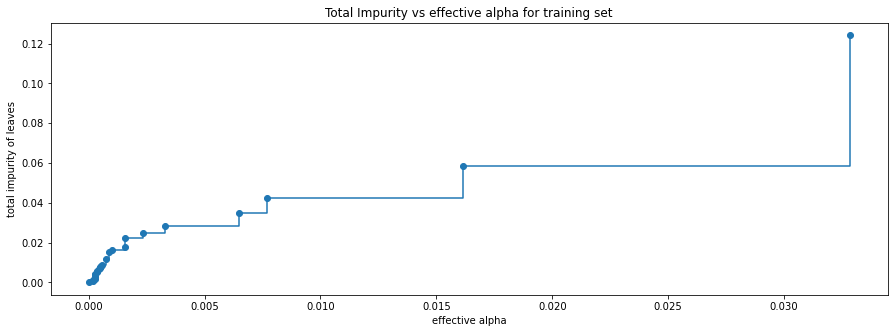

<IPython.core.display.Javascript object>

In [180]:
# plotting the total impurities of leaves against the effective alphas
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

The highest value / last value in ccp_alphas (0.047) is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [181]:
clfs = []
for ccp_alpha in ccp_alphas:
    dTree5 = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dTree5.fit(X_train, y_train)
    clfs.append(dTree5)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596768


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

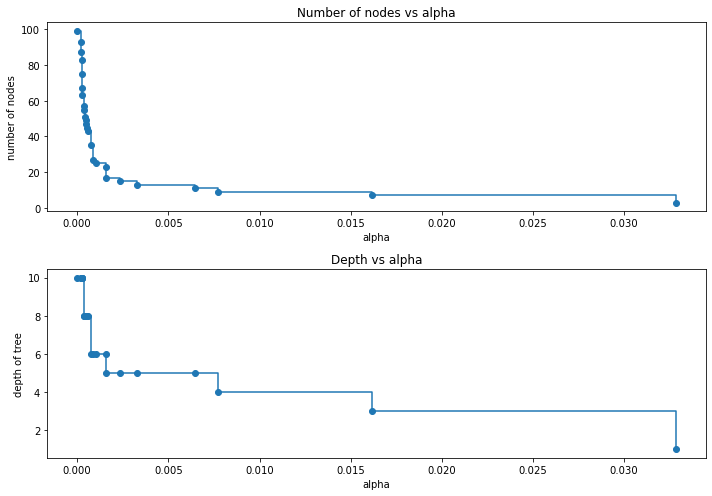

<IPython.core.display.Javascript object>

In [182]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dTree5.tree_.node_count for dTree5 in clfs]
depth = [dTree5.tree_.max_depth for dTree5 in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

We can see that depth and number of nodes decrease as alpha increases. 

Let's plot the recall for train and test for these models.

In [183]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [184]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

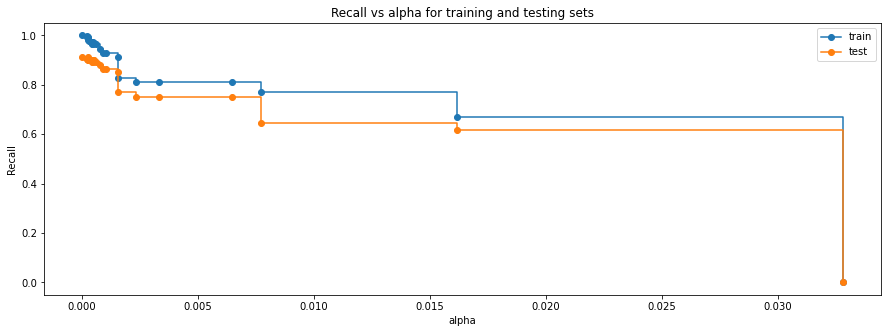

<IPython.core.display.Javascript object>

In [185]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [186]:
# creating the model where we get highest train and test recall
index_best_model1 = np.argmax(recall_test)
best_model1 = clfs[index_best_model1]
print(best_model1)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

The best ccp_alpha appears to be 0.000. Let's see how this model turns out to be. 

Confusion Matrix | Model: 5 | Dataset: training


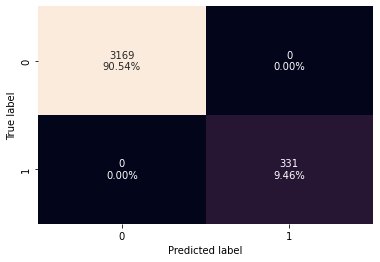

<IPython.core.display.Javascript object>

In [187]:
# creating confusion matrix for train data
print("Confusion Matrix | Model: 5 | Dataset: training")
confusion_matrix_sklearn_with_threshold(best_model1, X_train, y_train)

Confusion Matrix | Model: 5 | Dataset: test


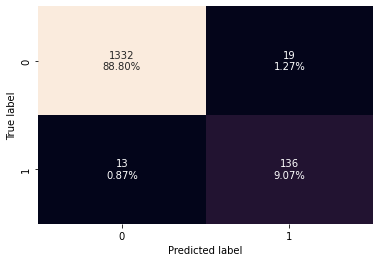

<IPython.core.display.Javascript object>

In [188]:
# creating confusion matrix for test data
print("Confusion Matrix | Model: 5 | Dataset: test")
confusion_matrix_sklearn_with_threshold(best_model1, X_test, y_test)

In [189]:
print("Performance Metrics | Model: 5 | Dataset: train")
decision_tree_postpruned_perf_train = model_performance_classification(
    best_model1, X_train, y_train
)
decision_tree_postpruned_perf_train

Performance Metrics | Model: 5 | Dataset: train


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

In [190]:
print("Performance Metrics | Model: 5 | Dataset: test")
decision_tree_postpruned_perf_test = model_performance_classification(
    best_model1, X_test, y_test
)
decision_tree_postpruned_perf_test

Performance Metrics | Model: 5 | Dataset: test


Accuracy    Recall  Precision        F1
0  0.978667  0.912752   0.877419  0.894737

<IPython.core.display.Javascript object>

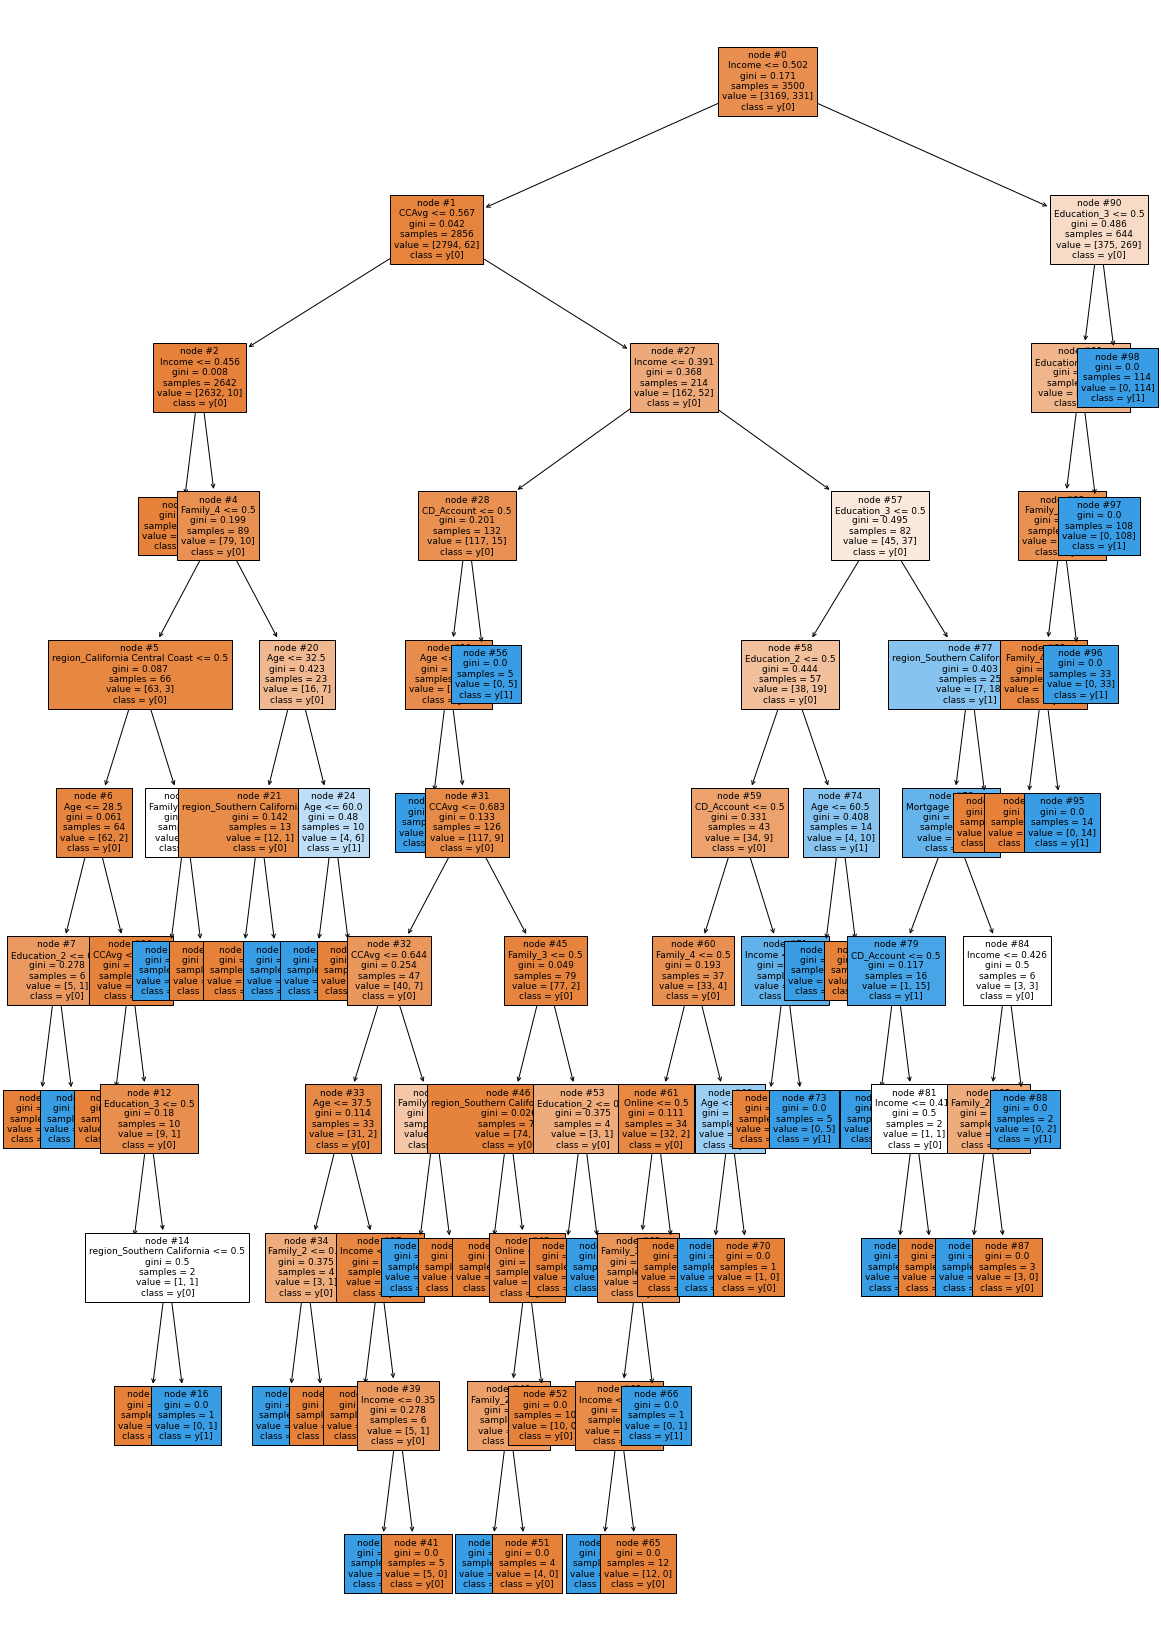

<IPython.core.display.Javascript object>

In [191]:
plt.figure(figsize=(20, 30))

tree.plot_tree(
    best_model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [192]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model1, feature_names=feature_names, show_weights=True))

|--- Income <= 0.50
|   |--- CCAvg <= 0.57
|   |   |--- Income <= 0.46
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  0.46
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- region_California Central Coast <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 0.42
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  0.42
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- region_Southern California <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00,

<IPython.core.display.Javascript object>

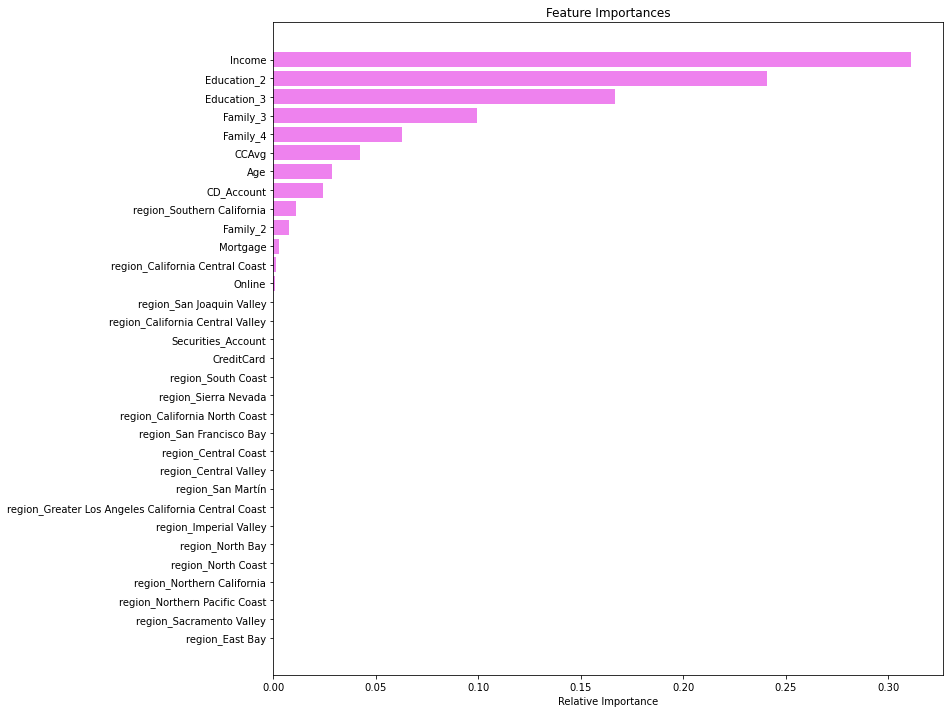

<IPython.core.display.Javascript object>

In [193]:
importances = best_model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [194]:
print(
    pd.DataFrame(
        best_model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                         Imp
Income                                              0.311069
Education_2                                         0.240847
Education_3                                         0.166724
Family_3                                            0.099344
Family_4                                            0.062971
CCAvg                                               0.042459
Age                                                 0.028730
CD_Account                                          0.024144
region_Southern California                          0.010823
Family_2                                            0.007674
Mortgage                                            0.002787
region_California Central Coast                     0.001422
Online                                              0.001006
CreditCard                                          0.000000
region_Northern Pacific Coast                       0.000000
region_South Coast      

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. The post pruned tree is highly complex and the best recall on the test set is 91% as opposed to 100% on the training set. This indicates overfitting and the model being unable to generalize on its learnings.
2. Important Features are Income, Education, Family and CCAvg. 

#### Model Comparisons

We built 5 decision tree models using different logic. We can compare how these models score with respect to each other and see what is the best model.

In [195]:
# we will concatentate the individual scores dataframes into a single dataframe

# declaring the scores dataframes into a variable
ind_perf_tables = [
    decision_tree_perf_train,
    decision_tree_perf_test,
    decision_tree_cw_train,
    decision_tree_cw_test,
    decision_tree_tune_perf_train,
    decision_tree_tune_perf_test,
    decision_tree_preprun_train,
    decision_tree_preprun_test,
    decision_tree_postpruned_perf_train,
    decision_tree_postpruned_perf_test,
]

# concatenating to the new df
# renaming the index to indicate the model and dataset
decisiontree_perf_comp_df = pd.concat(ind_perf_tables, ignore_index=True).rename(
    index={
        0: "Default Tree_Train",
        1: "Default Tree_Test",
        2: "Class Weights Balanced_Train",
        3: "Class Weights Balanced_Test",
        4: "Prepruned-GridSearchCV_Train",
        5: "Prepruned-GridSearchCV_Test",
        6: "Prepruned-Improved HyperParameter Tuning_Train",
        7: "Prepruned-Improved HyperParameter Tuning_Test",
        8: "Postpruned-ccp_alpha=0.0_Train",
        9: "Postpruned-ccp_alpha=0.0_Test",
    }
)
decisiontree_perf_comp_df

Accuracy    Recall  Precision  \
Default Tree_Train                              1.000000  1.000000   1.000000   
Default Tree_Test                               0.978667  0.912752   0.877419   
Class Weights Balanced_Train                    1.000000  1.000000   1.000000   
Class Weights Balanced_Test                     0.980000  0.865772   0.928058   
Prepruned-GridSearchCV_Train                    0.992571  0.939577   0.981073   
Prepruned-GridSearchCV_Test                     0.980667  0.865772   0.934783   
Prepruned-Improved HyperParameter Tuning_Train  0.926000  0.990937   0.561644   
Prepruned-Improved HyperParameter Tuning_Test   0.930000  0.979866   0.588710   
Postpruned-ccp_alpha=0.0_Train                  1.000000  1.000000   1.000000   
Postpruned-ccp_alpha=0.0_Test                   0.978667  0.912752   0.877419   

                                                      F1  
Default Tree_Train                              1.000000  
Default Tree_Test                               0.894737  
Class Weights Balanced_Train                    1.000000  
Class Weights Balanced_Test                     0.895833  
Prepruned-GridSearchCV_Train                    0.959877  
Prepruned-GridSearchCV_Test                     0.898955  
Prepruned-Improved HyperParameter Tuning_Train  0.716940  
Prepruned-Improved HyperParameter Tuning_Test   0.735516  
Postpruned-ccp_alpha=0.0_Train                  1.000000  
Postpruned-ccp_alpha=0.0_Test                   0.894737

<IPython.core.display.Javascript object>

##### <span style="color:blue">Observations</span>
1. The prepruned tree with improved hyper parameter tuning (Model: <b>Prepruned-Improved HyperParameter Tuning</b>) gave us impressive recall scores - 99% on the training set and 98% on the test. Accuracy is also good - 93% on both training and test sets. 
2. The best tree has the following characteristics:
    max_leaf_nodes=10,
    min_impurity_decrease=0.001,
    random_state=1,
    class_weight={0: 0.09, 1: 0.91},
    max_depth=8
3. Income, CCAvg, Family and Education are the most important features
4. The tree is not complex and begins to branch at Income <= 0.39.

## <font color='purple'><b>Summary and Conclusions</b></font> 

We have extensively analysed the data and built two sturdy models. Before we make recommendations on which model to use, let us look at a summary of the work we've done.  

### <font color='darkblue'><b>Summary of Data </b></font>

1. We started with a dataset of 5000 rows and 14 columns, including the target variable : Personal Loan.
2. There was only one float type column: CCAvg.
3. The dataset captured information like Education, Experience, Family, Average Spending on Credit Cards, ZipCode, Mortgages if any, etc.
4. There were no duplicated rows.
5. Features are classified according to data type as follows: 
    
    Nominal Variables:
        ID
        Zip Code
    Categorical Variables:
        Education (non-binary)
        Securities_Account (binary)
        CD_Account (binary)
        Online (binary)
        CreditCard (binary)
        Family (non-binary)
    Interval Variables:
        Age
        Experience
        Income
        CCAvg
        Mortgage

### <font color='darkblue'><b>Summary of Data Treatments</b></font>

1. The zipcode column was mapped to counties using uszipcode package. The resulting counties were 39 in number and needed reduction. So they were further mapped to regions in California. The resulting number of regions were 20 and more handy when it comes to model building. 
2. There were few null values in Mortgage and Experience variables, but were found to be relevant data, and therefore was retained. CCAvg also had few null values, however, we did not have enough data in the dataset to make any meaningful treatment on these null, hence they had to be retained. 
3. There were negative values for Experience variable, which did not seem meaningful. So they were imputed with the median of Experience by grouping the Age and Education of customers with a positive Experience. 
4. The interval columns were transformed into bins and stored in separate columns of their own. This helped to categorize customers into different profile and helped in visualizing during EDA.


### <font color='darkblue'><b>Key Observations from EDA</b></font>

1. Customers on the higher scale of Income(99,000-224,000usd), middle aged(55-70 years), Graduate/Professional Education, longer career durations (almost 15-45 years of experience) and have a family of 3 or 4 members tend to purchase most personal loans. They prefer to have online accounts at their banks, have higher mortgages (300,000-600,000usd) and a higher spending on credit cards(roughly 2500-10,000usd).
2. The next set of customers with potential to purchase a personal loan are middle income customers (40,000-98,000usd), in a mid-management level(5-15 years of experience) in their career, who could be either seniors(55-70 years) or young adults (20-35 years), with tendencies of moderate credit card spending (700-2500usd) and graduate level of education. They could have 1 or 2 members in their family. 
3. Los Angeles county, which is in the South Coast region, topped the number of loan borrowers at a high of 111. Los Angeles County also has the most number of customers in this dataset (1095).
4. Southern California region ranks second in the purchase of personal loans.
5. Customers with a higher average spending on their credit cards tend to purchase more personal loans.
6. Customers with advanced education (level 3) tend to purchase personal loans and their median income is significantly higher than their peers with the same education. For example, a Level 3 educated, non-borrower customer has median income closer to 50,000, whereas a Level 3 educated, borrower has median income around 150,000.
7. Families with members 3 & above tend to purchase personal loans, especially when their income is above 100,000.
8. Income and CCAvg are highly correlated to the purchase of personal loans.

### <font color='darkblue'><b>Data Preparation: Outlier Treatments and Scaling</b></font>

1. Outliers were identified in Income, CCAvg and Mortgage columns. Outliers on income appeared to be relevant values and no treatment was applied. CCAvg and Mortgage outliers were clipped to the upper whiskers. 
2. The columns Income, CCAvg and Mortgage were on different scales. After treating the outliers, we used MinMax scaling on these features since their distributions were skewed. 
3. The columns ID, Zipcode, county, and the bin variables for the interval variables were dropped as they could not contribute meaningfully to the models we were building.
4. The column Experience was also dropped since it was highly positively correlated with Age, and it would be best to retain only one of these columns for the purpose of building the models. 
5. The dataset is highly imbalanced, with true:false being in the ratio ~1:9. 
6. Data was split into train and test in a 70:30 ratio and retained the ratio of true:false in every dataset. 

### <font color='darkblue'><b>Model Evaluation Criteria</b></font>

When a bank like AllLife Bank is trying to grow their customer base in US and generate revenues, missing out on a potential customer is a severe loss. Therefore, the objective of the model is to reduce the loss of opportunity, i.e., false negatives. This means Recall should be maximised. Greater the Recall, greater the chance of identifying a customer who will purchase a loan.

### <font color='darkblue'><b>Summary of model building</b></font>

<font color='green'><b>Logistic Regression Models</b></font> 

We build 7 logistic regression models, in the following order:
- A default Model with threshold = 0.5
- A lower threshold model, threshold =0.2 
- Class Weights Balanced model with threshold= 0.2
- Class weights inversed model with threshold =0.2
- Model with Optimal threshold from AUC-ROC, threshold = 0.144
- Model with Optimal threshold from Precision-Recall, threshold =0.27
- Feature Selection with threshold=0.27

The <b>Class weights inversed model with threshold =0.2</b> gave us the best recall, 98% on training and 97% on test. The model gave positive coefficients for Income, CCAvg and CD Account and Education, therefore a 1 unit increase on any of these features keeping all others constant, would likely increase the chance for the customer to purchase a loan. 

<font color='green'><b>Decision Tree Models</b></font> 

We build 5 decision tree models in the following order:
- A default decision tree
- Class Weights Balanced model
- Model Prepruned with GridSearchCV
- Model Prepruned by Improved HyperParameter Tuning
- Postpruned Tree with best ccp_alpha

The <b>Prepruned tree with improved hyper parameter tuning</b> gave us impressive recall scores - 99% on the training set and 98% on the test. Accuracy is also good - 93% on both training and test sets.
The best tree has the following characteristics: 
- max_leaf_nodes=10, 
- min_impurity_decrease=0.001,
- class_weight={0: 0.09, 1: 0.91}, 
- max_depth=8

Income, CCAvg, Education and Family are the most important features. The tree is not complex and begins to branch at Income <= 0.39.

### <font color='darkblue'><b>Recommended Model</b></font>

Two models gave us recall scores above 95% in the test data:
- Logistic Regression model using threshold =0.2 and inversed class weights and
- Decision Tree with improved hyperparameter tuning.

Both models have given us comparable scores, so we can recommend the <b>Decision Tree</b> to the business since Decision Trees are easy to train and understand. 

Generating the confusion matrix and tree again below:

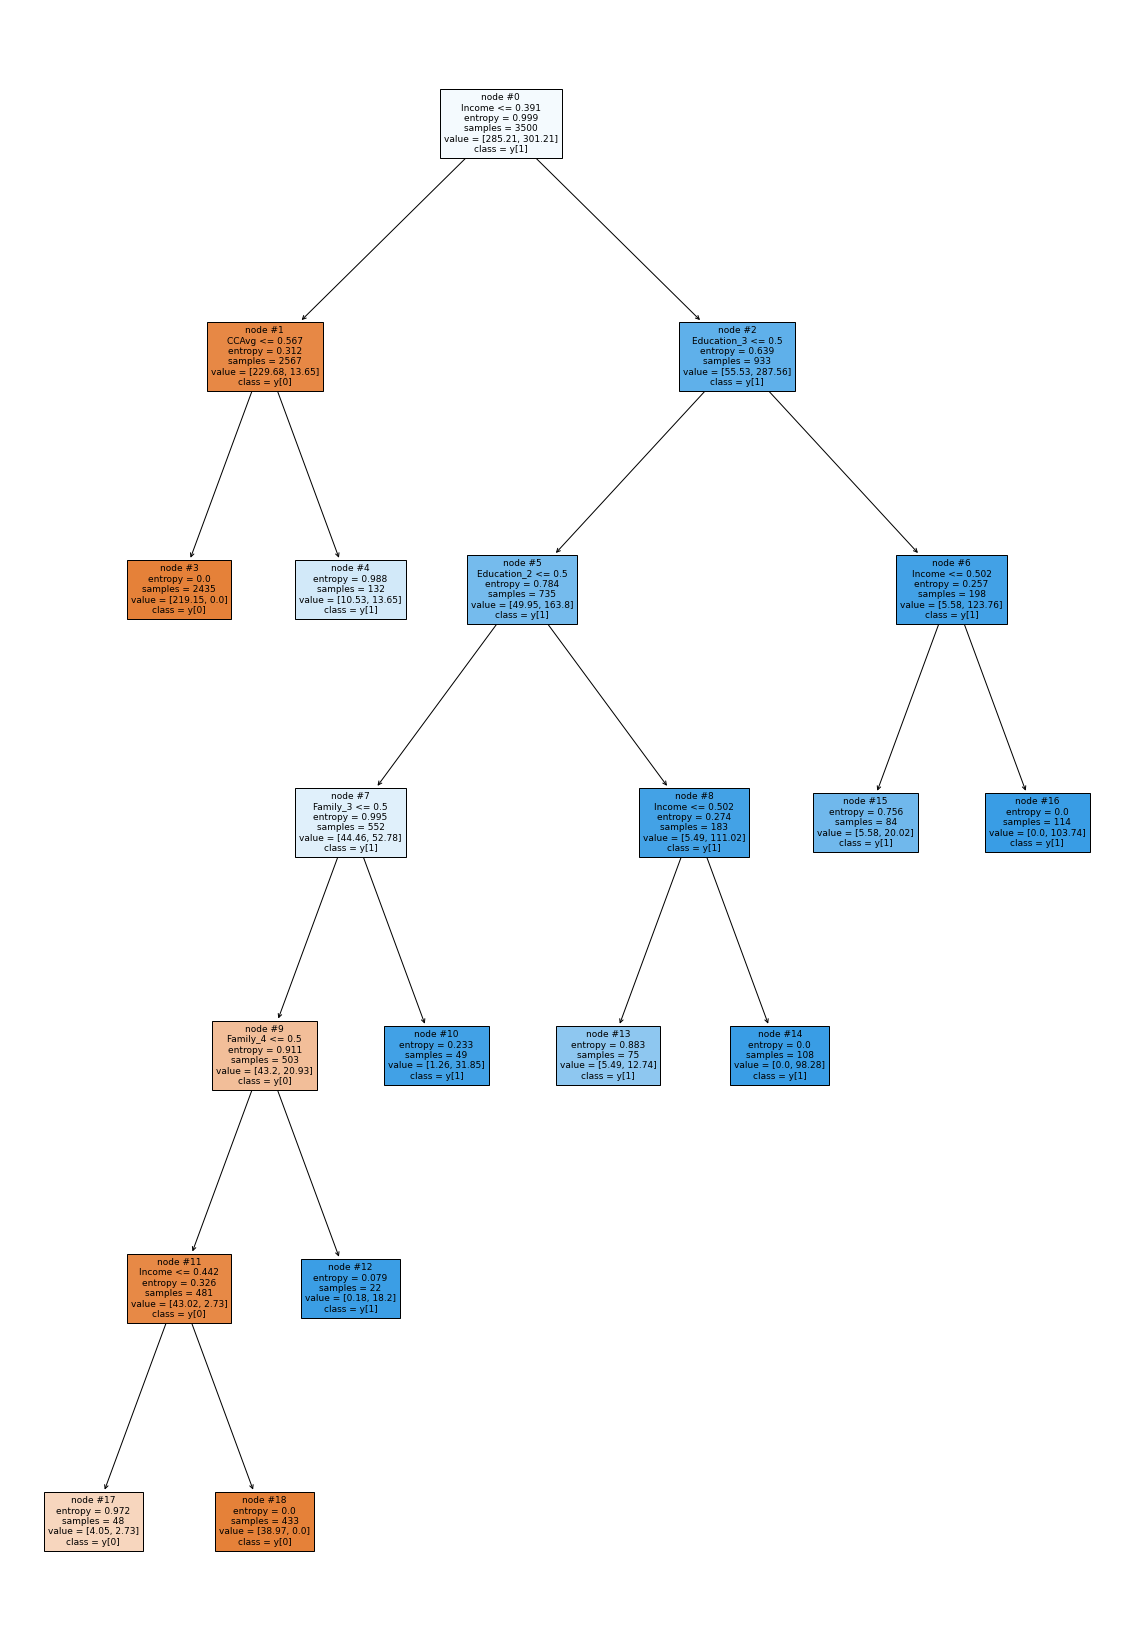

<IPython.core.display.Javascript object>

In [196]:
# generating the decision tree

plt.figure(figsize=(20, 30))

tree.plot_tree(
    dTree4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Confusion Matrix | Dataset: training


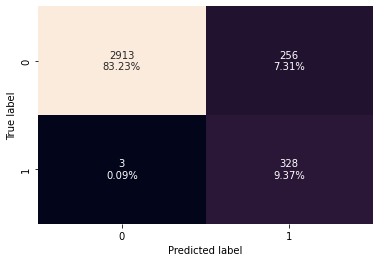

<IPython.core.display.Javascript object>

In [197]:
# creating confusion matrix for train data of the improvised prepruned tree
print("Confusion Matrix | Dataset: training")
confusion_matrix_sklearn_with_threshold(dTree4, X_train, y_train)

Confusion Matrix | Dataset: test


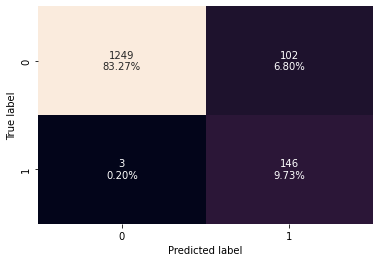

<IPython.core.display.Javascript object>

In [198]:
# creating confusion matrix for test data of the improvised prepruned tree
print("Confusion Matrix | Dataset: test")
confusion_matrix_sklearn_with_threshold(dTree4, X_test, y_test)

### <font color='darkblue'><b>False Positive and Negative Analysis</b></font>

True Positives (TP): the model correctly predicted 146 customers will purchase personal loans

True Negatives (TN): the model correctly predicted that 1249 customers will not purchase personal loans

False Positives (FP): the model incorrectly predicted that 102 customers will purchase a personal loan (a "Type I error") 

False Negatives (FN): the model incorrectly predicted that 3 customers will not purchase a personal loan (a "Type II error") 

## <font color='purple'><b>Actionable Insights and Recommendations</b></font>

When a bank is trying to expand its footprints in a country like US, it is essential that they should not miss out on a potential opportunity. Here the opportunity is a customer purchasing a personal loan, and therefore, any models that we build should be able to accurately predict a potential borrower. Falsely predicting someone as a non-borrower, when he/she actually could be a borrower is detrimental to the growth plans of the bank.

To this end, our model aims to reduce false negatives, or increase recall. The best performance model that achieves this objective is a Decision Tree, in which Income, Education, CCAvg and Family are the most important features.

AllLife Bank can profile their customers according to purchasing potential:

- <b>High Potential</b>: These customers typically are on the higher scale of Income(99,000-224,000usd), middle aged(55-70 years), Graduate/Professional Education, longer career durations (almost 15-45 years of experience) and have a family of 3 or 4 members. They tend to have online accounts at their banks, higher mortgages (300,000-600,000usd) and a higher spending on credit cards(roughly 2500-10,000usd).

- <b>Moderate Potential</b>: Focus on middle income customers (40,000-98,000usd), in a mid-management level(5-15 years of experience) in their career, who could be either seniors(55-70 years) or young adults (20-35 years), with tendencies of moderate credit card spending (700-2500usd) and graduate level of education. They could have 1 or 2 members in their family.

- <b>Low Potential</b>: These are low income category (5000-39000usd) of customers, undergrads with very little working experience (0-5 years), as well as credit card spending (0-700usd), and a smaller family.

Few steps AllLife Bank can take to target potential customers.
- Utilize the power of online apps to target potential customers and send targeted, personalized promotions to attract them. 
- Consider the work and experience of high potential customers, they could be leading a very busy lifestyle. A dedicated customer manager could help to build close relationships and engage with them often. 
- Encourage the moderate & low potential customers by educating them on how personal loans can help to improve their lives - for example, this could help an undergrad to join a vocational course to acquire essential job skills, without having to take a hefty educational loan. 
- While focusing on California to build their footprints, AllLife Bank can focus on the South Coast and Southern California regions to run promotions to attract potential borrowers.